In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import ast
import seaborn as sns
#import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames
import copy
import matplotlib.pyplot as plt

In [ ]:
file_name_lust = "lust_results.csv"
df_lust = pd.read_csv(file_name_lust)

In [ ]:
df_lust

Modal No. of iterations Traffic Scale Reward Function  \
0         Simple               500            25               1   
1         Simple               500            50               1   
2         Simple               500            75               1   
3         Simple               500           100               1   
4         Simple              1000            25               1   
..           ...               ...           ...             ...   
120         SUMO              4000            25            None   
121         SUMO              4000            50            None   
122         SUMO              4000            75            None   
123         SUMO              4000           100            None   
124  sumoAverage           average       average     noneAverage   

     Waiting cars      Speed  Waiting Time    TimeLoss  Depart delay  \
0      632.000000  17.970000      25.17000   75.830000         23.91   
1     2902.000000  11.640000      44.62000   99.100000         27.96   
2     5472.000000  14.670000      38.76000   95.620000         44.59   
3     8198.000000  13.570000      40.11000   95.140000         49.63   
4      865.000000  18.080000      37.78000   83.250000         14.94   
..            ...        ...           ...         ...           ...   
120   3291.000000  16.380000     111.29000  230.360000        172.13   
121   7504.000000  12.870000     225.92000  391.930000        217.05   
122  11938.000000  11.380000     318.43000  518.930000        227.03   
123  17038.000000  10.620000     390.95000  613.030000        242.15   
124   6042.666667  14.735417     133.91125  252.640417        150.22   

    Team member  
0         Rawan  
1         Rawan  
2         Rawan  
3         Rawan  
4         Rawan  
..          ...  
120      Kareem  
121      Kareem  
122      Kareem  
123      Kareem  
124         All  

[125 rows x 10 columns]

In [ ]:
def visualization_lust(traffic_scale = "25" , variable = "Waiting Time" ):
  f1, (ax1, ax2)= plt.subplots(figsize=(9,9), nrows=1, ncols=2)
  f1.suptitle(f"{variable} for traffic scale = {traffic_scale}")
  f1.tight_layout(pad=2)

  df_25 = df_lust[df_lust['Traffic Scale'] == traffic_scale]
  df_25_simple = df_25[df_25['Modal'] == 'Simple']
  df_25_full = df_25[df_25['Modal'] == 'Full']
  df_25_sumo = df_25[df_25['Modal'] == 'SUMO']

  df_25_simple_1 = df_25_simple[df_25_simple['Reward Function'] == '1']
  df_25_simple_2 = df_25_simple[df_25_simple['Reward Function'] == '2']
  df_25_full_1 = df_25_full[df_25_full['Reward Function'] == '1']
  df_25_full_2 = df_25_full[df_25_full['Reward Function'] == '2']

  df_25_simple_12 = df_25_simple_1[df_25_simple_1['No. of iterations'] == '2000']
  df_25_simple_13 = df_25_simple_1[df_25_simple_1['No. of iterations'] == '3000']
  df_25_simple_14 = df_25_simple_1[df_25_simple_1['No. of iterations'] == '4000']
  df_25_simple_15 = df_25_simple_12.append([df_25_simple_13, df_25_simple_14], ignore_index=True)

  df_25_simple_22 = df_25_simple_2[df_25_simple_2['No. of iterations'] == '2000']
  df_25_simple_23 = df_25_simple_2[df_25_simple_2['No. of iterations'] == '3000']
  df_25_simple_24 = df_25_simple_2[df_25_simple_2['No. of iterations'] == '4000']
  df_25_simple_25 = df_25_simple_22.append([df_25_simple_23, df_25_simple_24], ignore_index=True)

  df_25_full_12 = df_25_full_1[df_25_full_1['No. of iterations'] == '2000']
  df_25_full_13 = df_25_full_1[df_25_full_1['No. of iterations'] == '3000']
  df_25_full_14 = df_25_full_1[df_25_full_1['No. of iterations'] == '4000']
  df_25_full_15 = df_25_full_12.append([df_25_full_13, df_25_full_14], ignore_index=True)

  df_25_full_22 = df_25_full_2[df_25_full_2['No. of iterations'] == '2000']
  df_25_full_23 = df_25_full_2[df_25_full_2['No. of iterations'] == '3000']
  df_25_full_24 = df_25_full_2[df_25_full_2['No. of iterations'] == '4000']
  df_25_full_25 = df_25_full_22.append([df_25_full_23, df_25_full_24], ignore_index=True)

  df_25_sumo_2 = df_25_sumo[df_25_sumo['No. of iterations'] == '2000']
  df_25_sumo_3 = df_25_sumo[df_25_sumo['No. of iterations'] == '3000']
  df_25_sumo_4 = df_25_sumo[df_25_sumo['No. of iterations'] == '4000']
  df_25_sumo_5 = df_25_sumo_2.append([df_25_sumo_3, df_25_sumo_4], ignore_index=True)

  ax1.plot("No. of iterations", variable, data = df_25_simple_1, label = "simple - 1")
  ax1.plot("No. of iterations", variable, data = df_25_simple_2, label = "simple - 2")
  ax1.plot("No. of iterations", variable, data = df_25_full_1, label = "full - 1")
  ax1.plot("No. of iterations", variable, data = df_25_full_2, label = "full - 2")
  ax1.plot("No. of iterations", variable, data = df_25_sumo, label = "sumo")
  ax1.set(xlabel = "No. of iterations")
  ax1.set_title(variable)
  ax1.legend()

  ax2.plot("No. of iterations", variable, data = df_25_simple_15, label = "simple - 1")
  ax2.plot("No. of iterations", variable, data = df_25_simple_25, label = "simple - 2")
  ax2.plot("No. of iterations", variable, data = df_25_full_15, label = "full - 1")
  ax2.plot("No. of iterations", variable, data = df_25_full_25, label = "full - 2")
  ax2.plot("No. of iterations", variable, data = df_25_sumo_5, label = "sumo")
  ax2.set(xlabel = "No. of iterations")
  ax2.set_title(variable)
  ax2.legend()

  plt.show()

<ipython-input-4-30a79c123adc>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_25_simple_15 = df_25_simple_12.append([df_25_simple_13, df_25_simple_14], ignore_index=True)
<ipython-input-4-30a79c123adc>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_25_simple_25 = df_25_simple_22.append([df_25_simple_23, df_25_simple_24], ignore_index=True)
<ipython-input-4-30a79c123adc>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_25_full_15 = df_25_full_12.append([df_25_full_13, df_25_full_14], ignore_index=True)
<ipython-input-4-30a79c123adc>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_25_full_25 = df_25_full_22.append([df

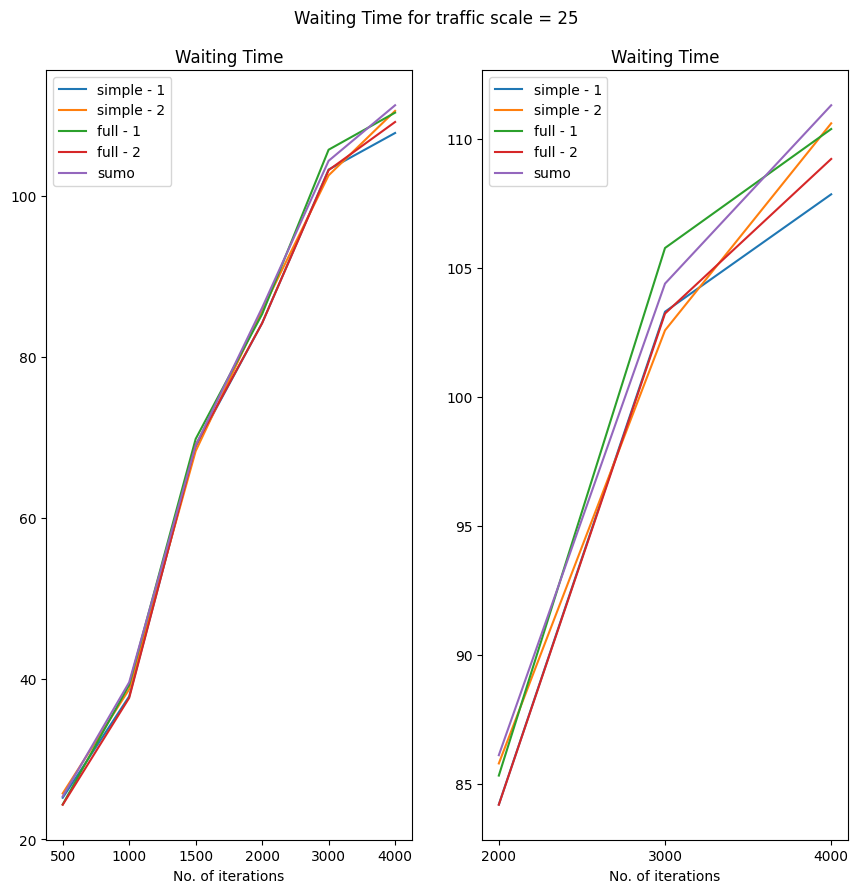

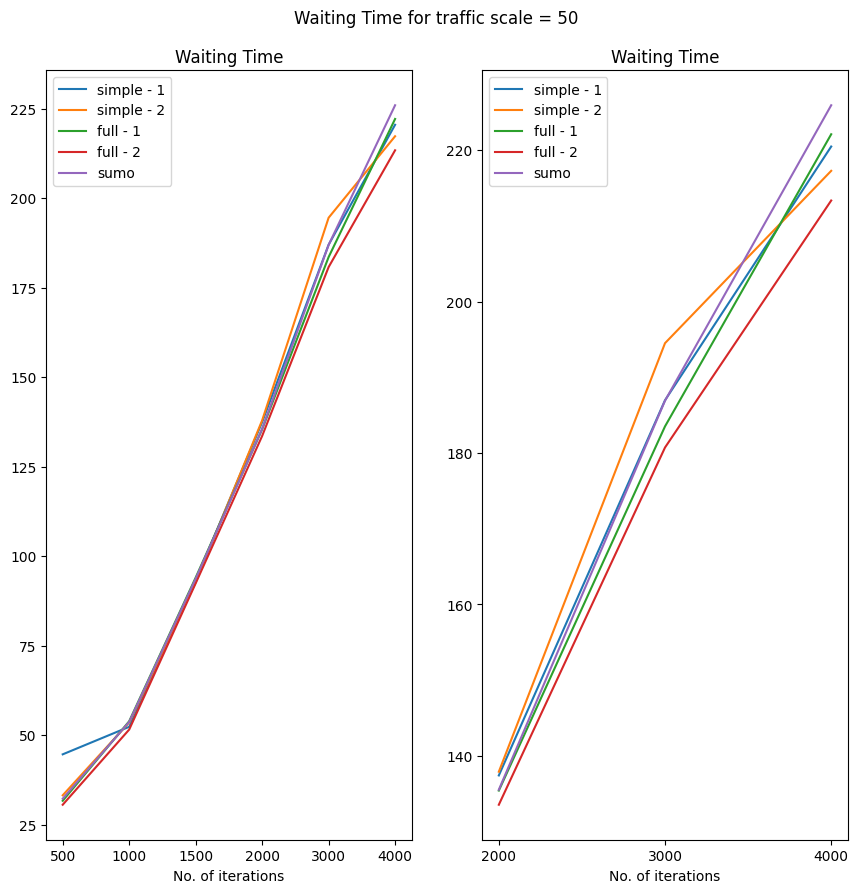

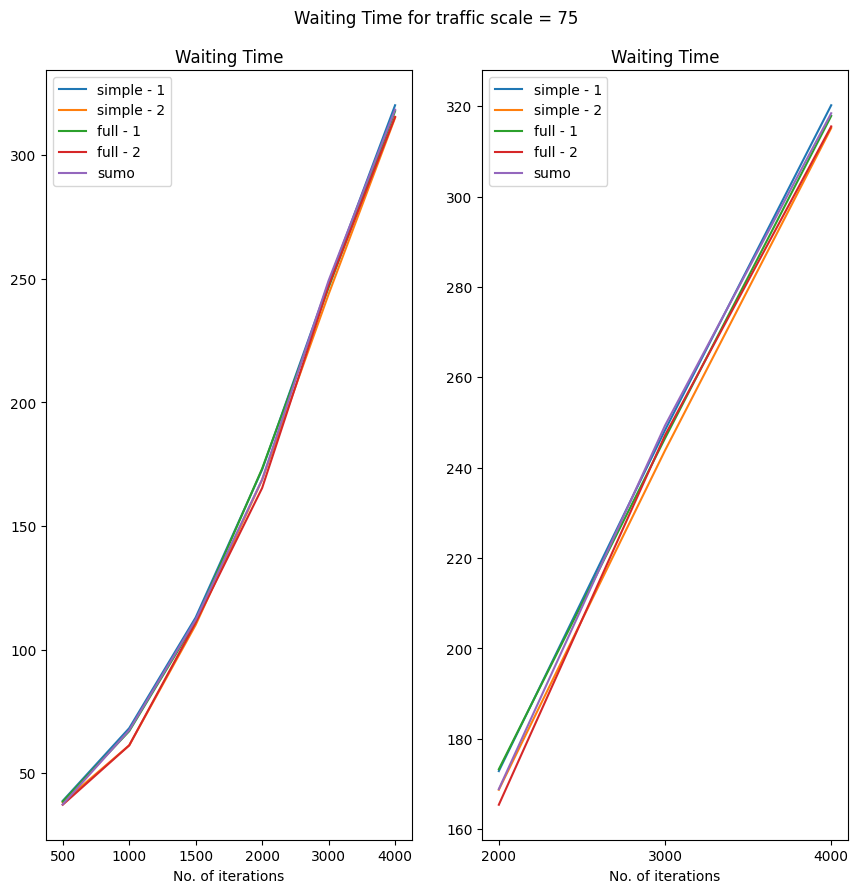

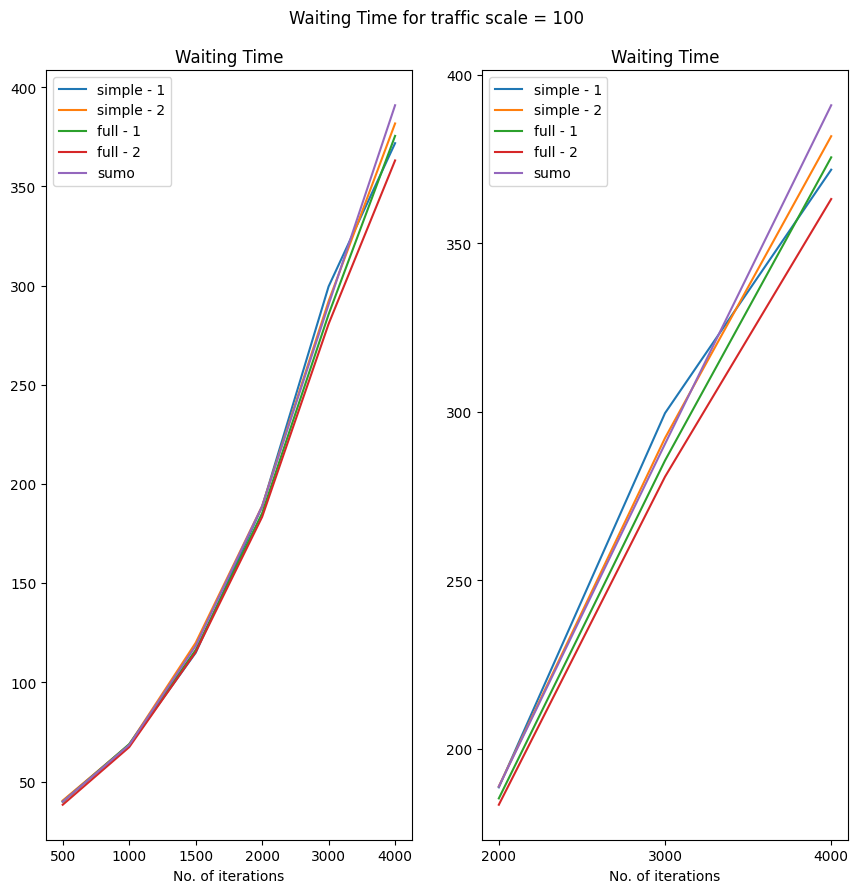

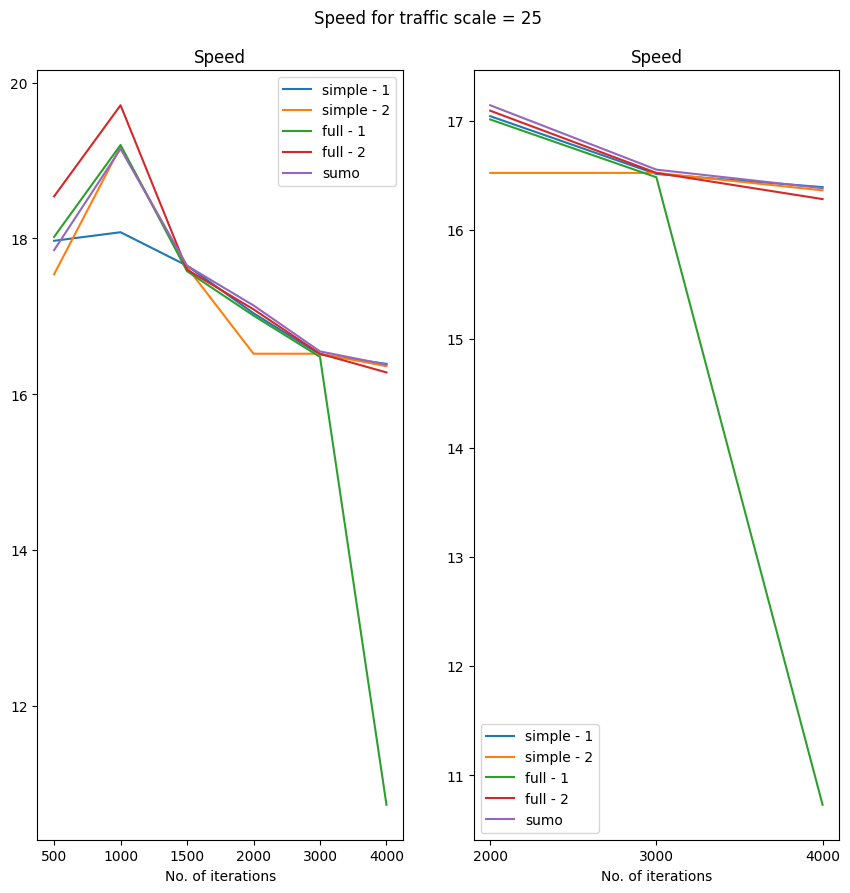

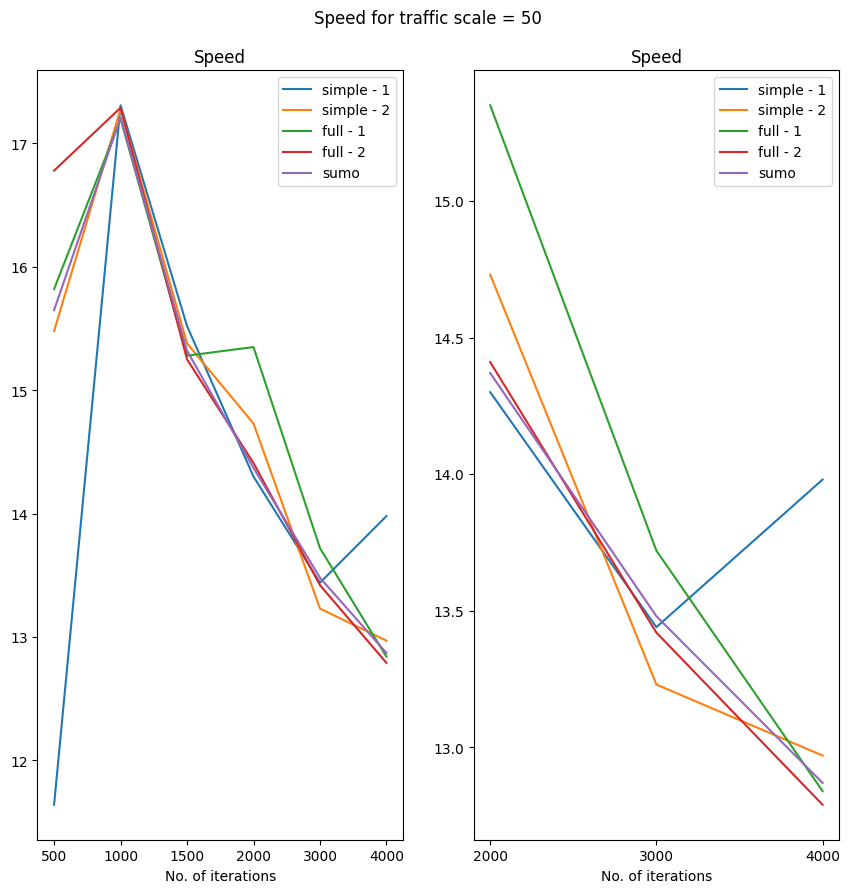

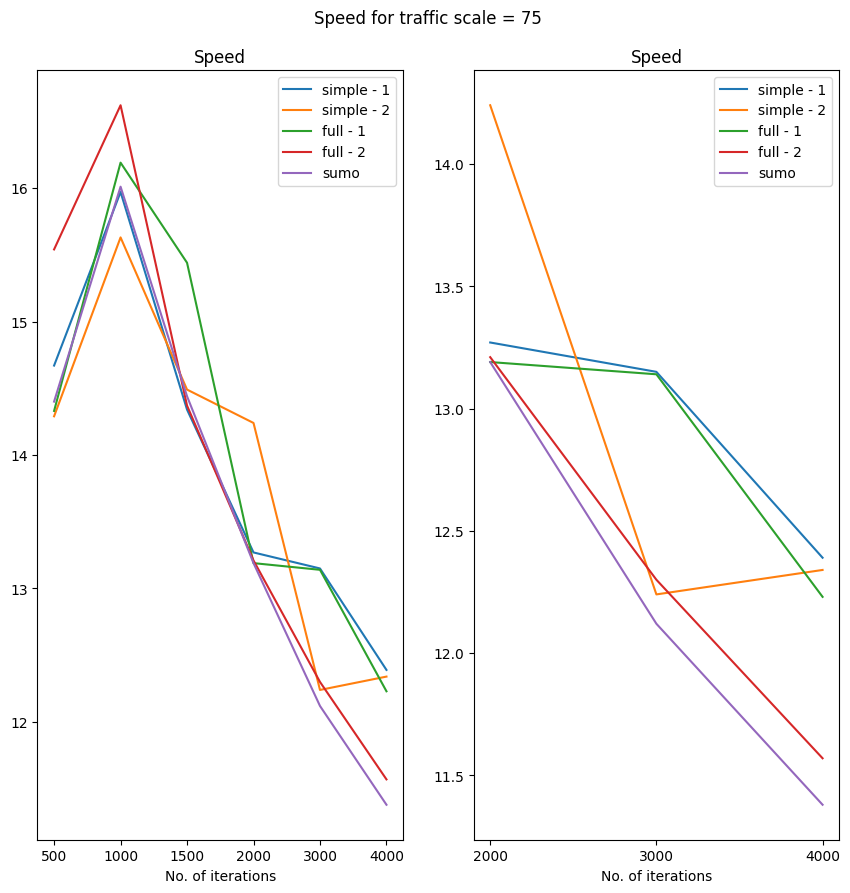

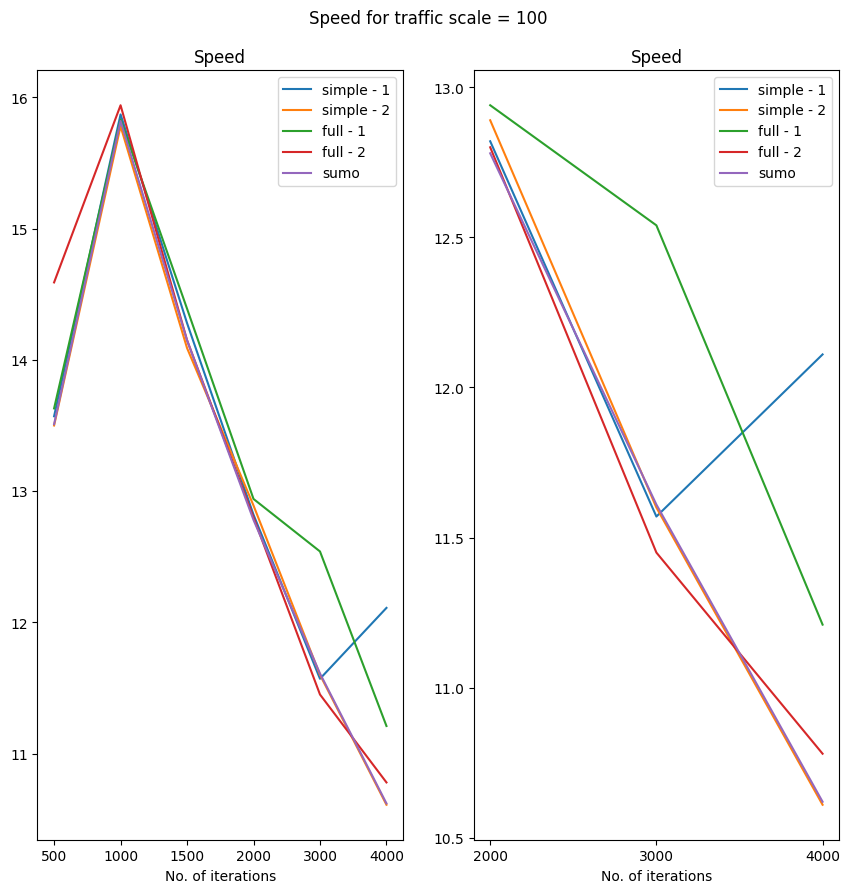

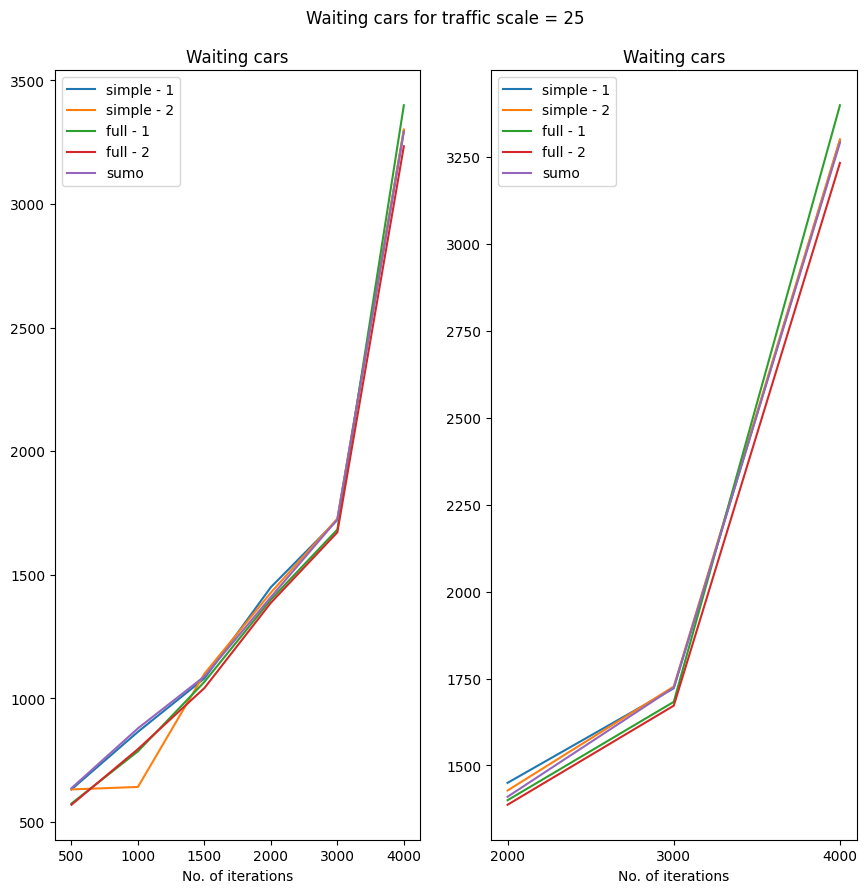

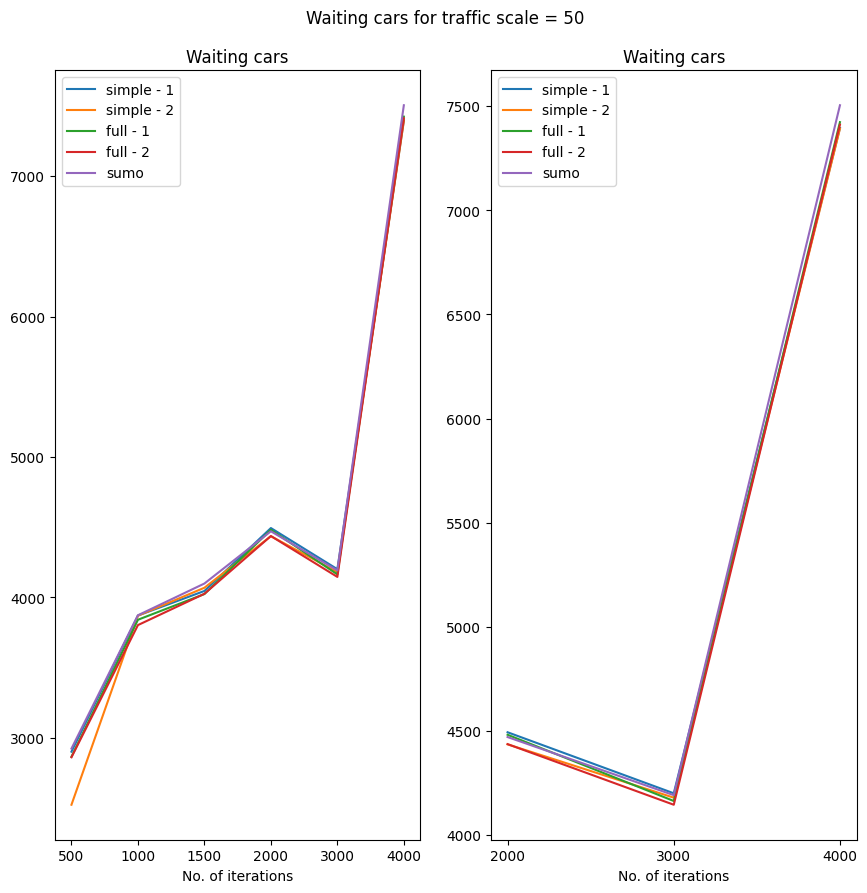

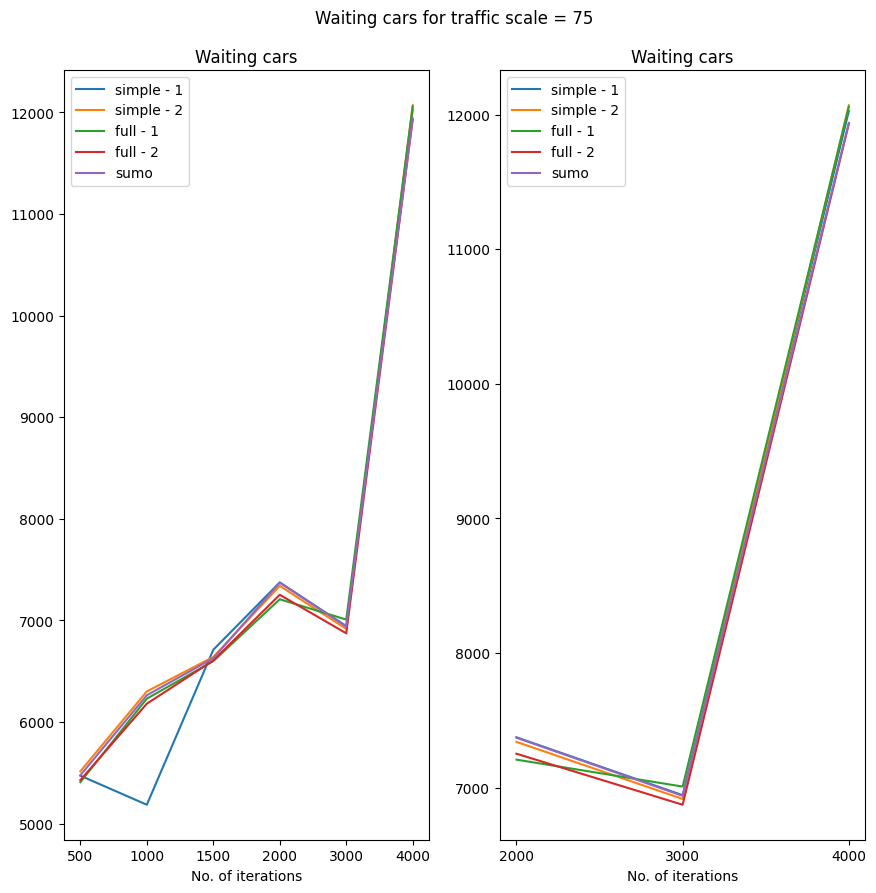

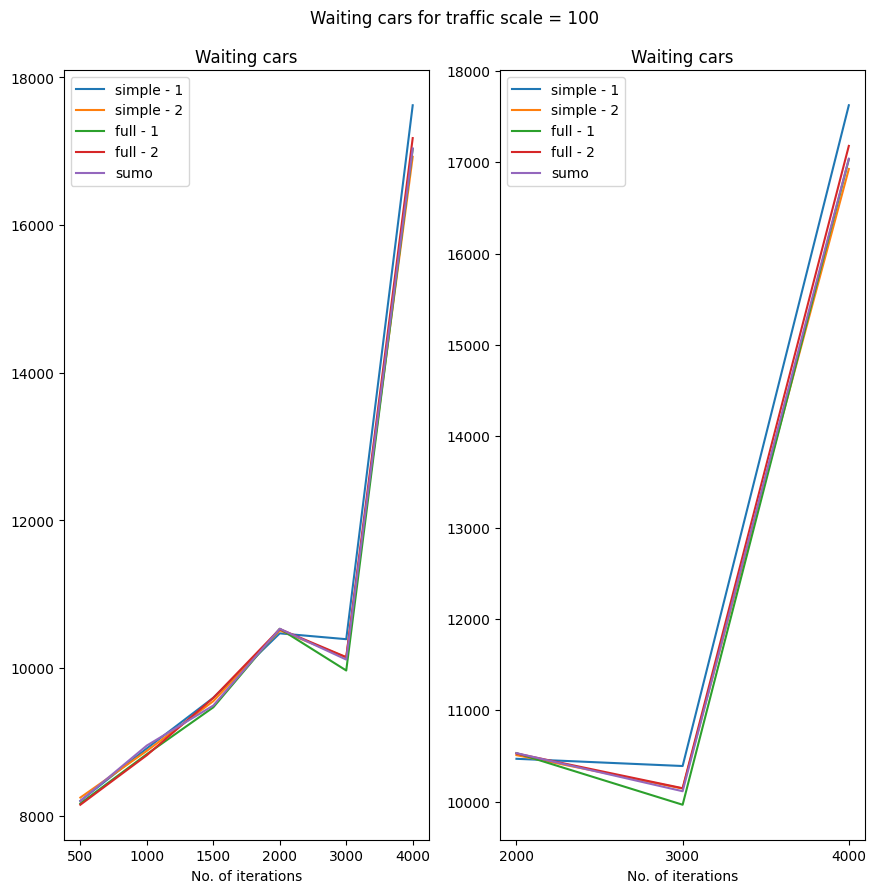

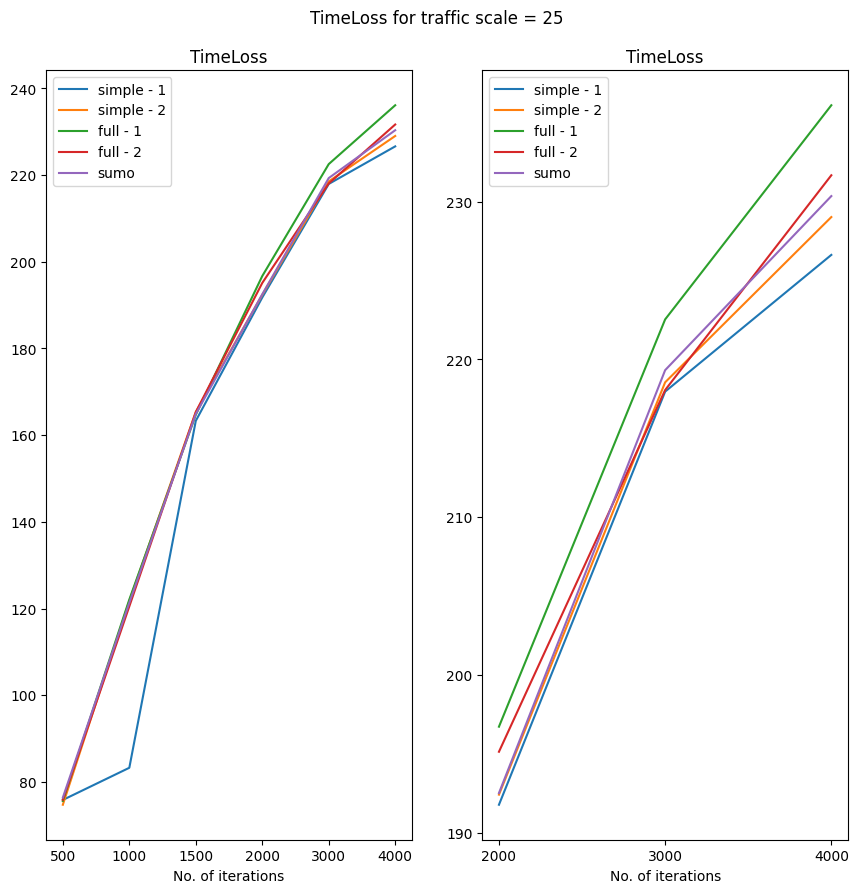

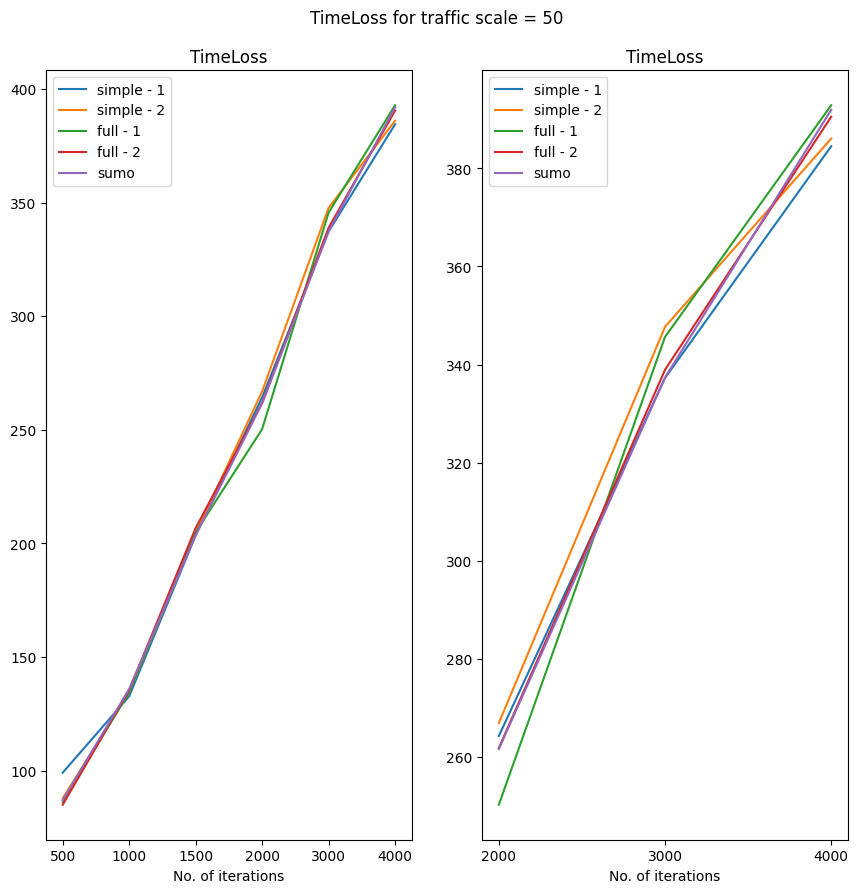

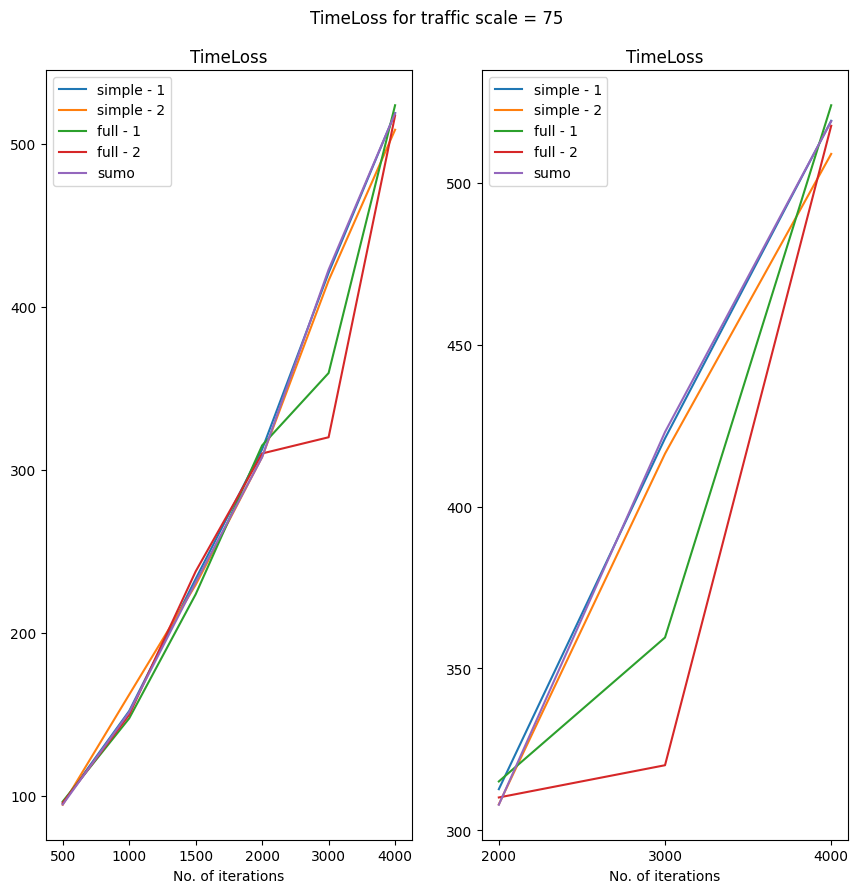

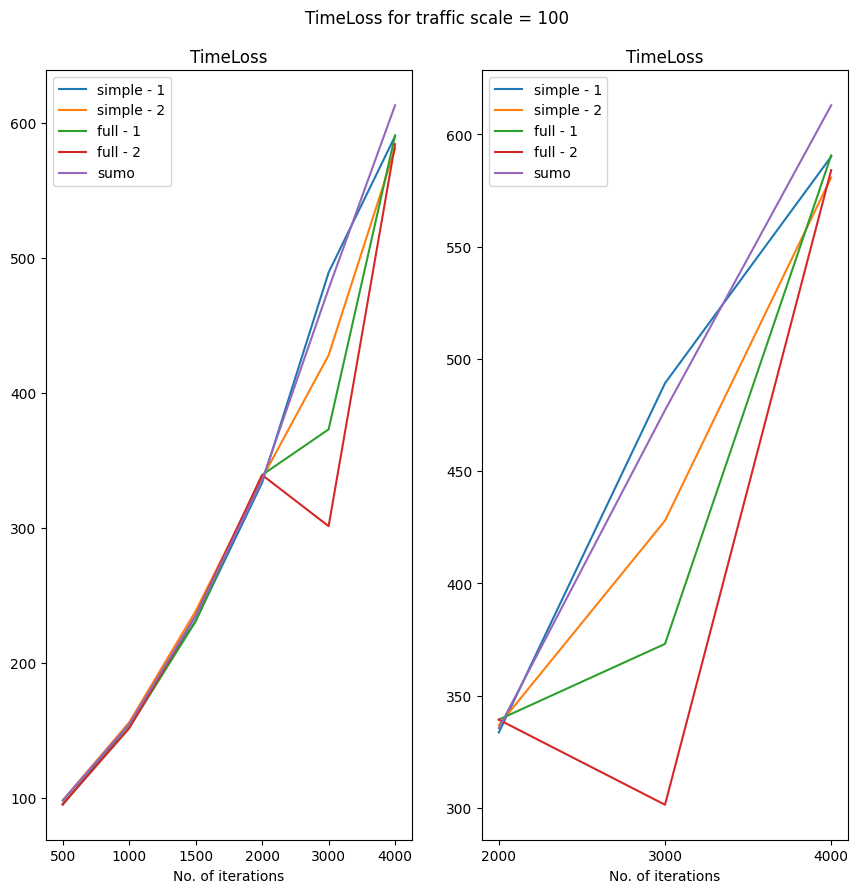

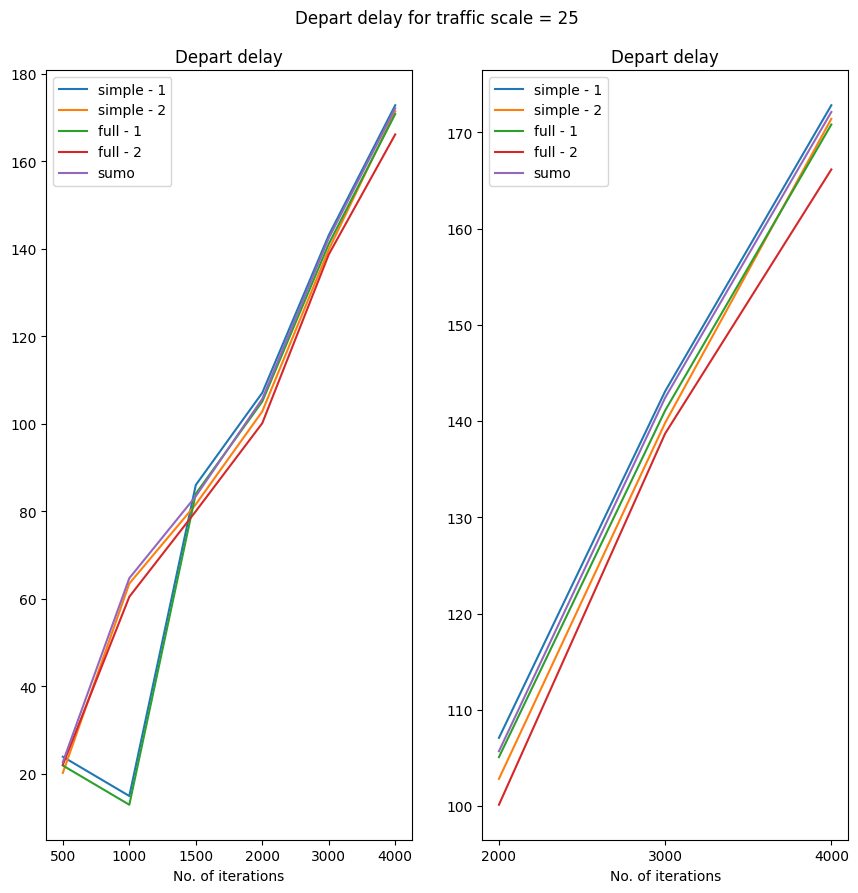

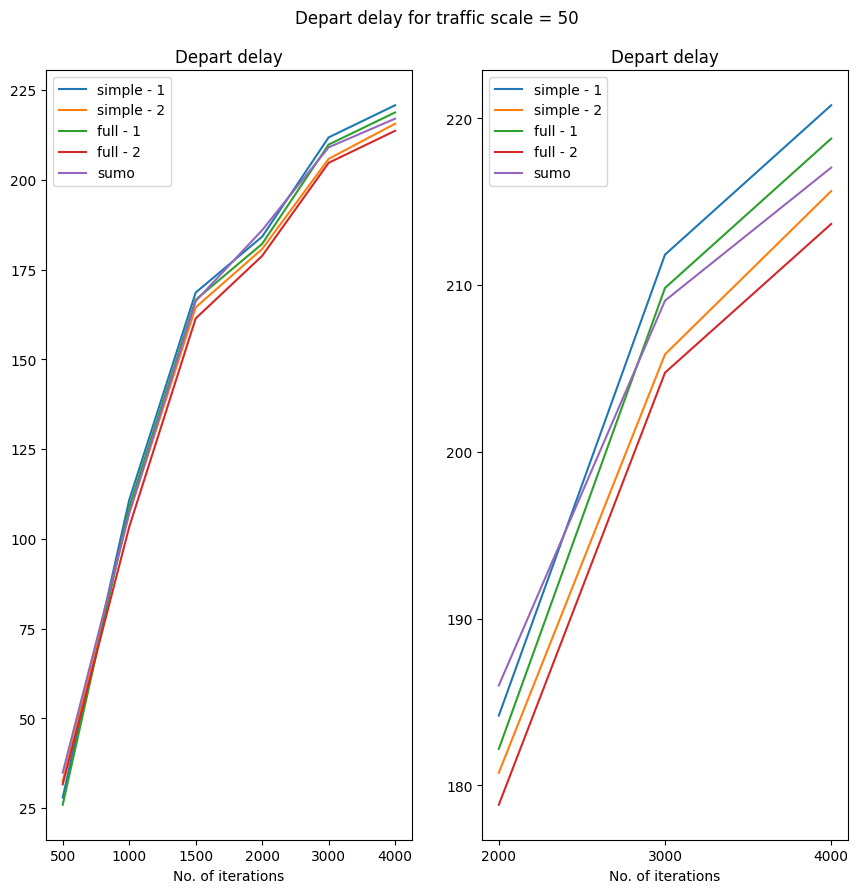

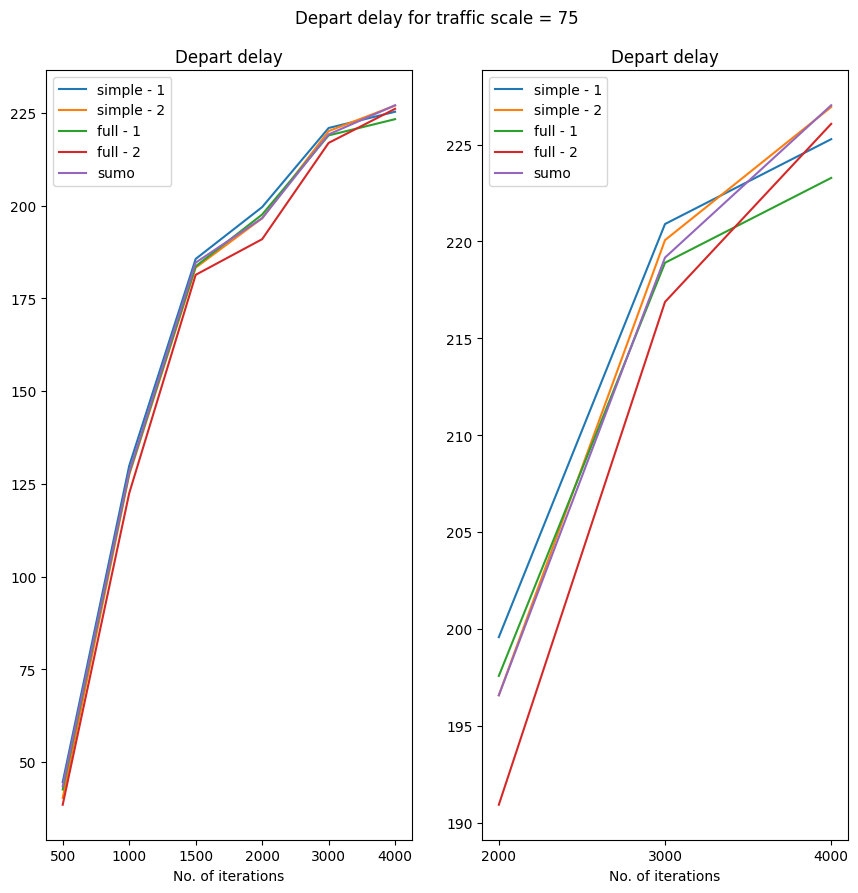

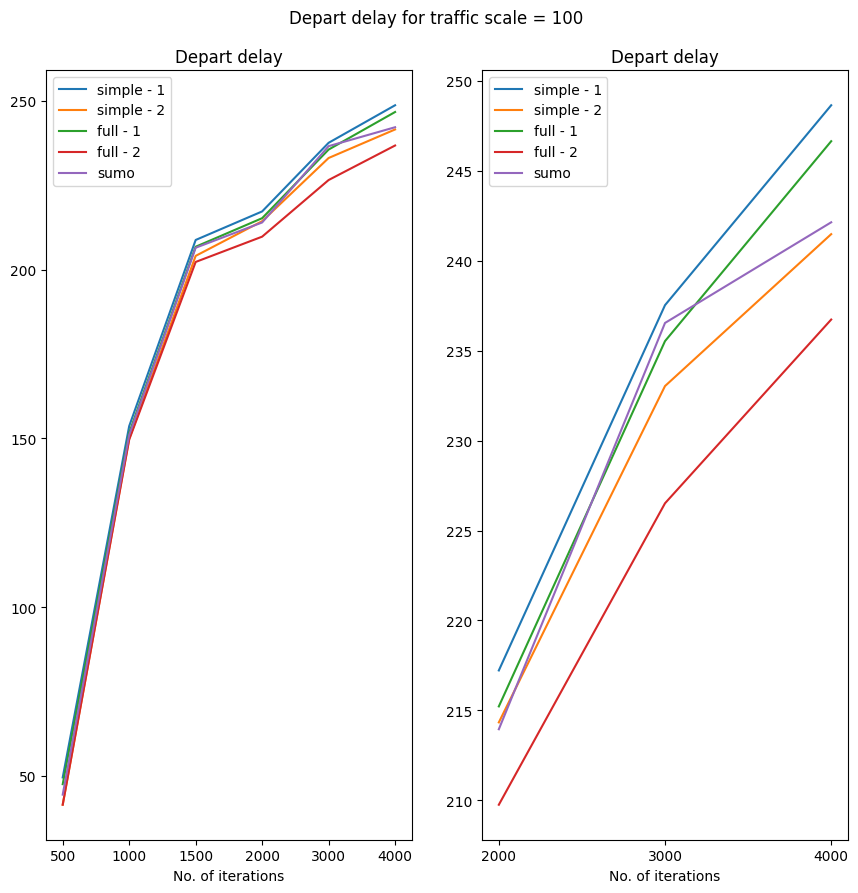

In [ ]:
variables = ["Waiting Time", "Speed", "Waiting cars" , "TimeLoss" , "Depart delay"]
scale = ["25" , "50" ,"75" , "100"]

for x in variables:
  for y in scale:
    visualization_lust(y,x)

In [ ]:
file_name_alex = "alex_results.csv"
df_alex = pd.read_csv(file_name_alex)

In [ ]:
df_alex

Modal No. of iterations Traffic Scale Reward Function  Waiting cars  \
0          Full               250            25               2    1652.00000   
1          Full               250            50               2    5313.00000   
2          Full               250            75               2    9588.00000   
3          Full               250           100               2   14014.00000   
4          Full               500            25               2    3222.00000   
5          Full               500            50               2   10771.00000   
6          Full               500            75               2   18957.00000   
7          Full               500           100               2   27745.00000   
8          Full               750            25               2    5169.00000   
9          Full               750            50               2   16621.00000   
10         Full               750            75               2   10878.00000   
11         Full               750           100               2   42091.00000   
12         Full              1000            25               2    7751.00000   
13         Full              1000            50               2   22910.00000   
14         Full              1000            75               2   39848.00000   
15         Full              1000           100               2   57415.00000   
16         Full              1500            25               2   12880.00000   
17         Full              1500            50               2   36354.00000   
18         Full              1500            75               2   62890.00000   
19         Full              1500           100               2   88522.00000   
20         Full              2000            25               2   18879.00000   
21         Full              2000            50               2   51079.00000   
22         Full              2000            75               2   85309.00000   
23         Full              2000           100               2  120885.00000   
24  fullAverage           average       average        2Average   32114.29167   
25         SUMO               250            25            None    1630.00000   
26         SUMO               250            50            None    5392.00000   
27         SUMO               250            75            None    9603.00000   
28         SUMO               250           100            None   14104.00000   
29         SUMO               500            25            None    3340.00000   
30         SUMO               500            50            None   10778.00000   
31         SUMO               500            75            None   19127.00000   
32         SUMO               500           100            None   27656.00000   
33         SUMO               750            25            None    5268.00000   
34         SUMO               750            50            None   16713.00000   
35         SUMO               750            75            None   10675.00000   
36         SUMO               750           100            None   42096.00000   
37         SUMO              1000            25            None    7702.00000   
38         SUMO              1000            50            None   22965.00000   
39         SUMO              1000            75            None   39916.00000   
40         SUMO              1000           100            None   57366.00000   
41         SUMO              1500            25            None   13093.00000   
42         SUMO              1500            50            None   37043.00000   
43         SUMO              1500            75            None   62150.00000   
44         SUMO              1500           100            None   88441.00000   
45         SUMO              2000            25            None   18773.00000   
46         SUMO              2000            50            None   51450.00000   
47         SUMO              2000            75            None   85784.00000   
48         SUMO              2000        

In [ ]:
def visualization_alex(traffic_scale = "25" , variable = "Waiting Time" ):
  f1, ax1= plt.subplots(figsize=(9,9), nrows=1, ncols=1)
  f1.suptitle(f"{variable} for traffic scale = {traffic_scale}")
  f1.tight_layout(pad=2)

  df_25 = df_alex[df_alex['Traffic Scale'] == traffic_scale]
  df_25_full = df_25[df_25['Modal'] == 'Full']
  df_25_sumo = df_25[df_25['Modal'] == 'SUMO']

  df_25_full_2 = df_25_full[df_25_full['Reward Function'] == '2']

  ax1.plot("No. of iterations", variable, data = df_25_full_2, label = "full - 2")
  ax1.plot("No. of iterations", variable, data = df_25_sumo, label = "sumo")
  ax1.set(xlabel = "No. of iterations")
  ax1.set_title(variable)
  ax1.legend()

  plt.show()

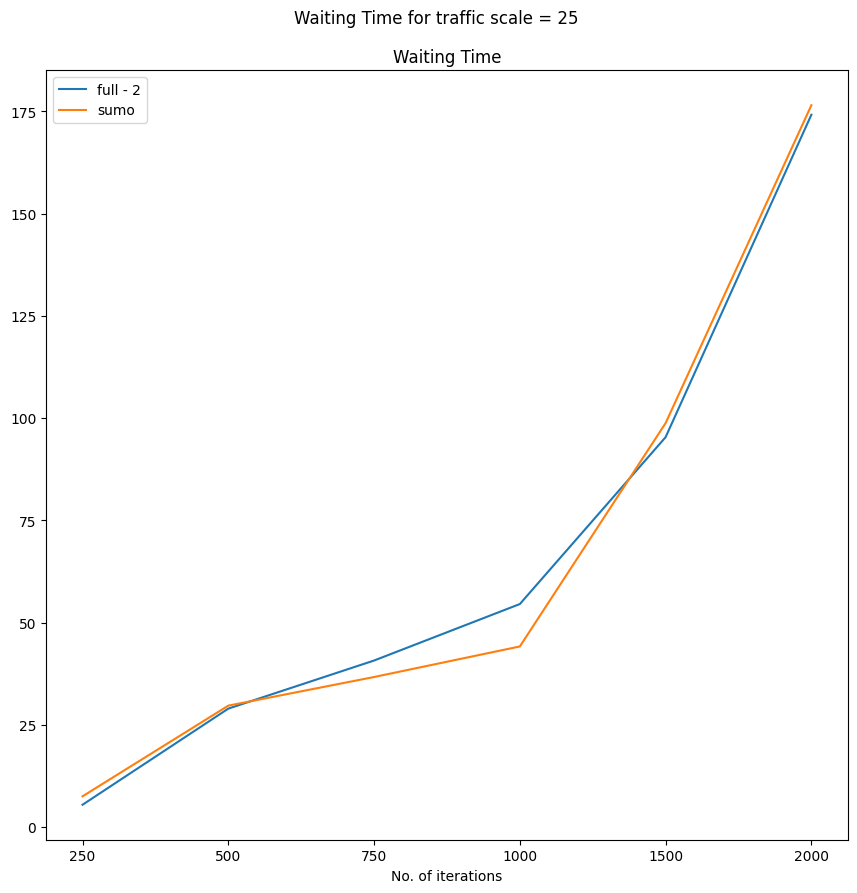

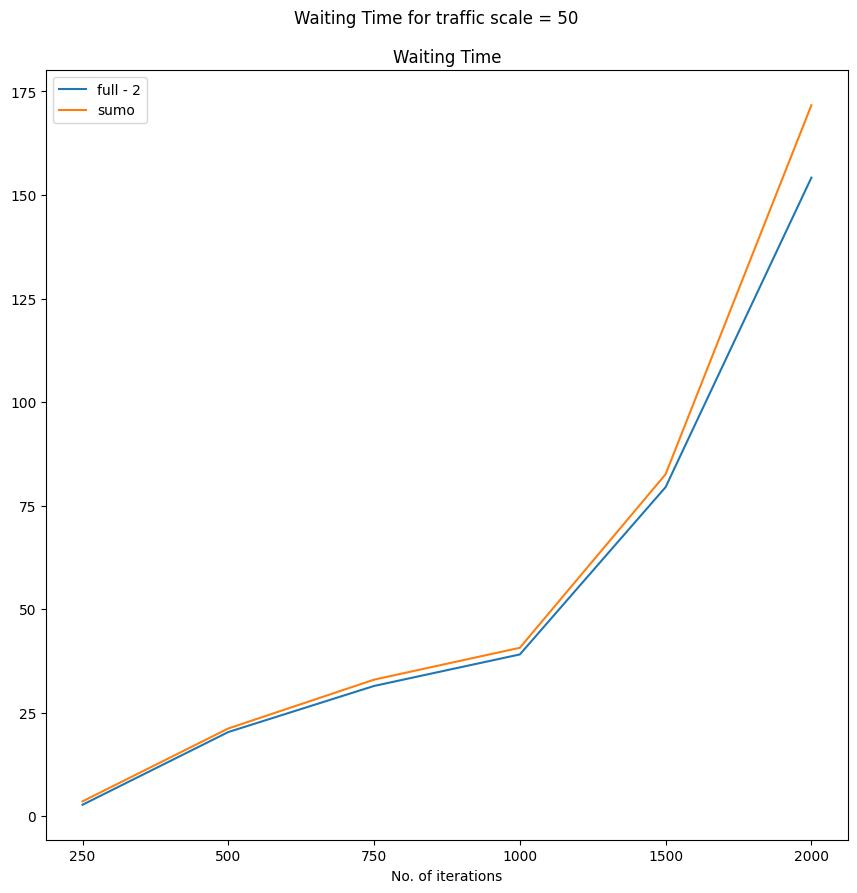

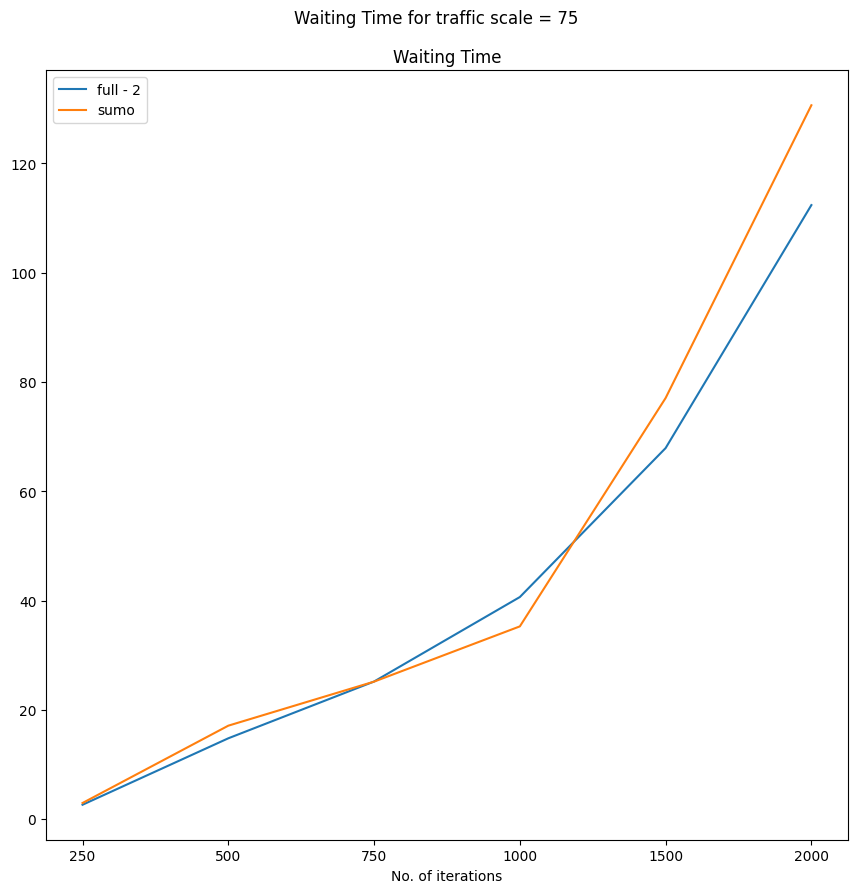

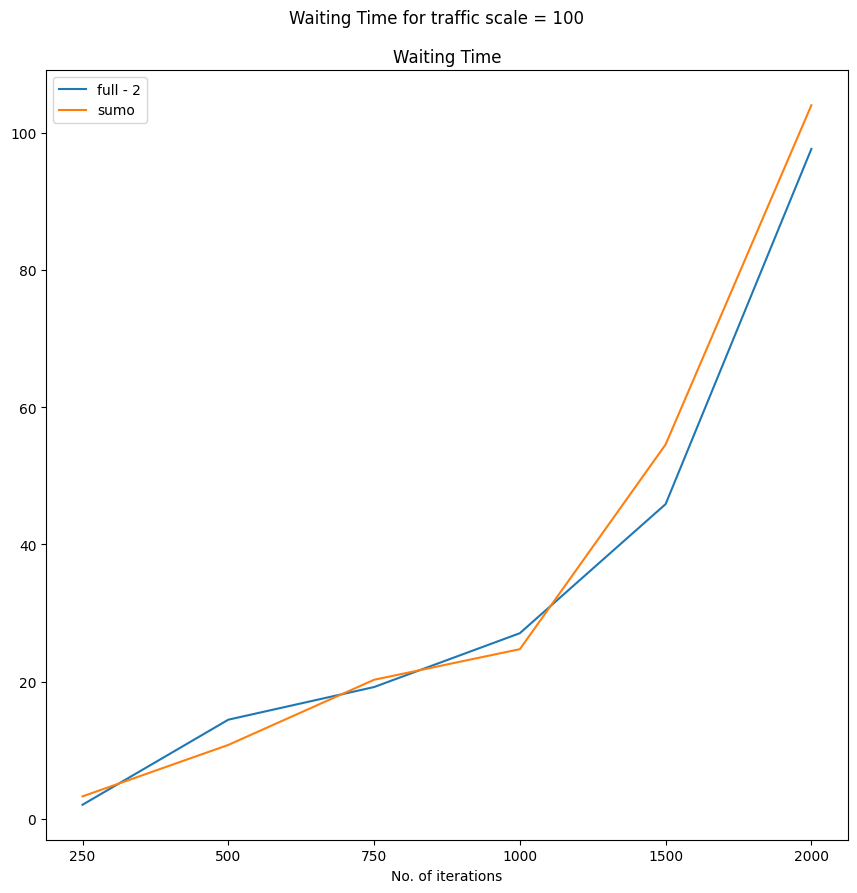

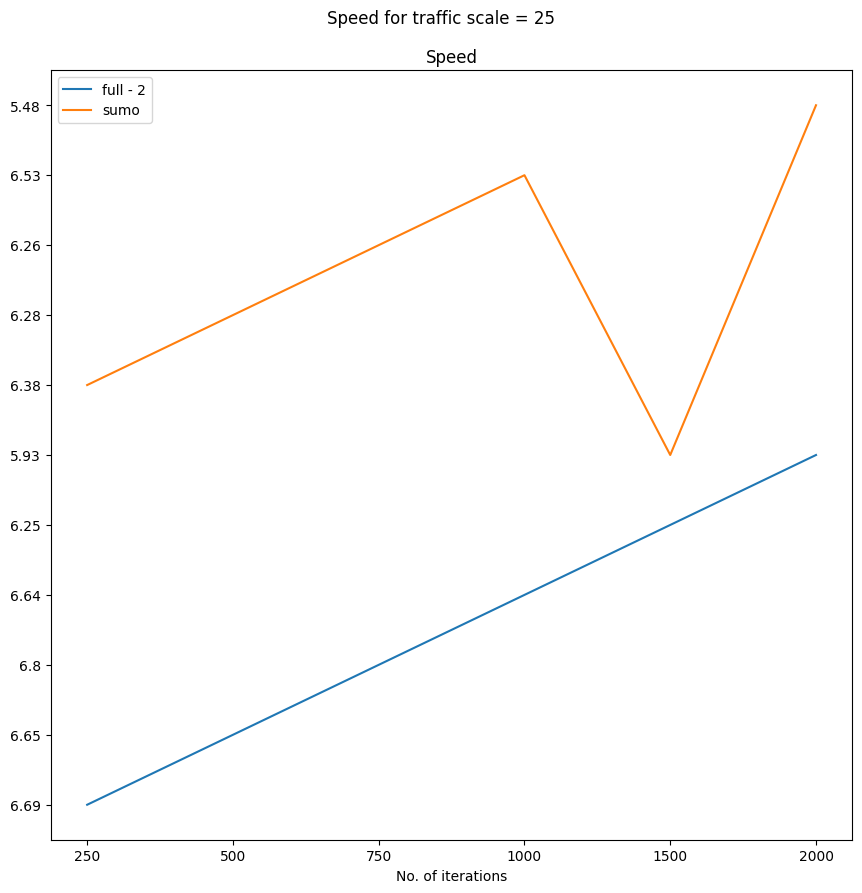

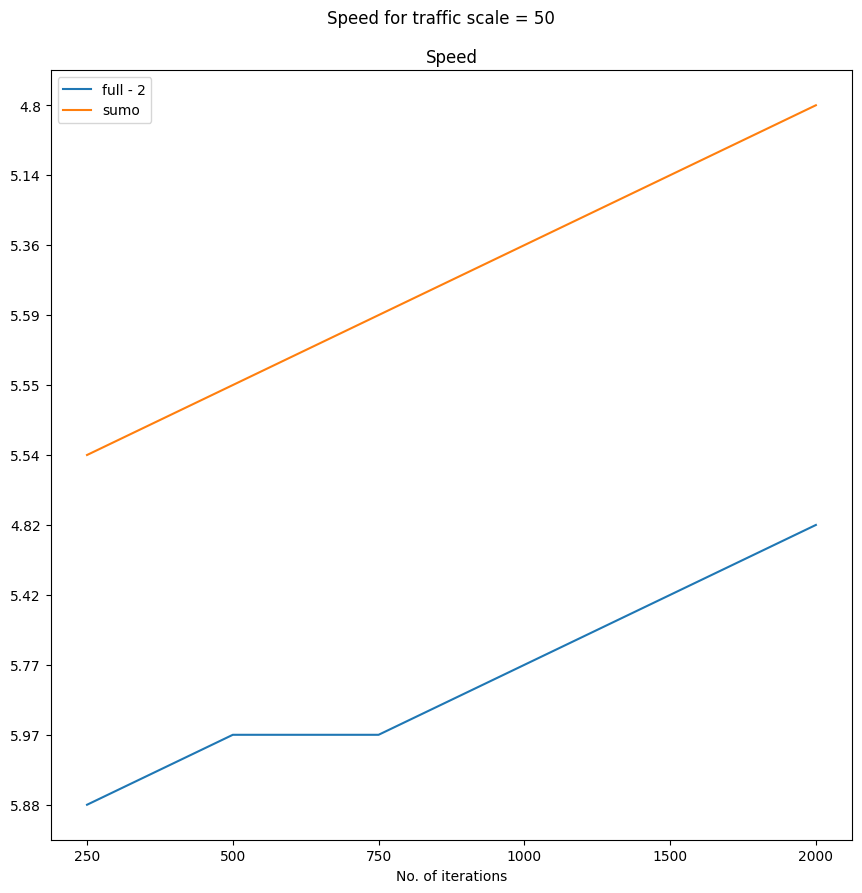

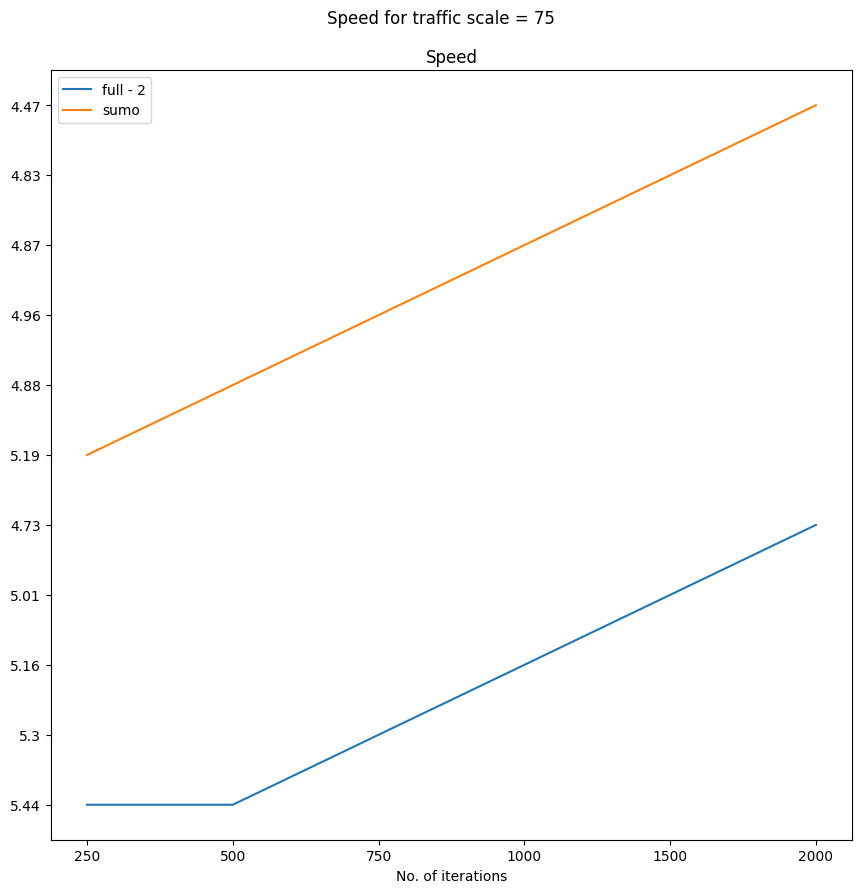

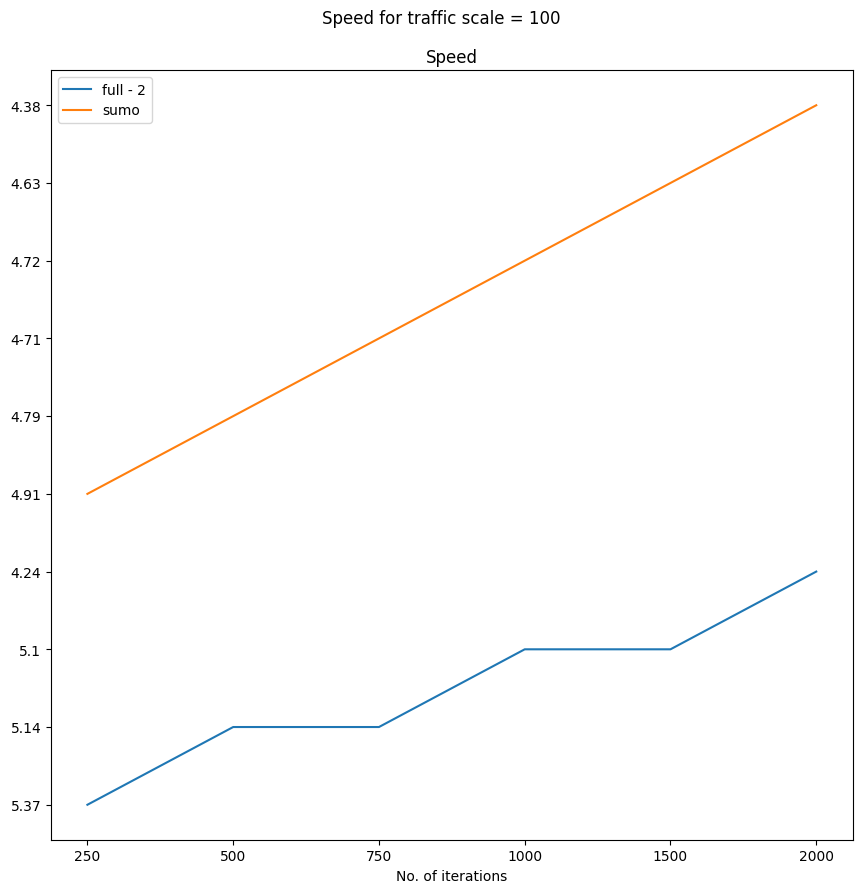

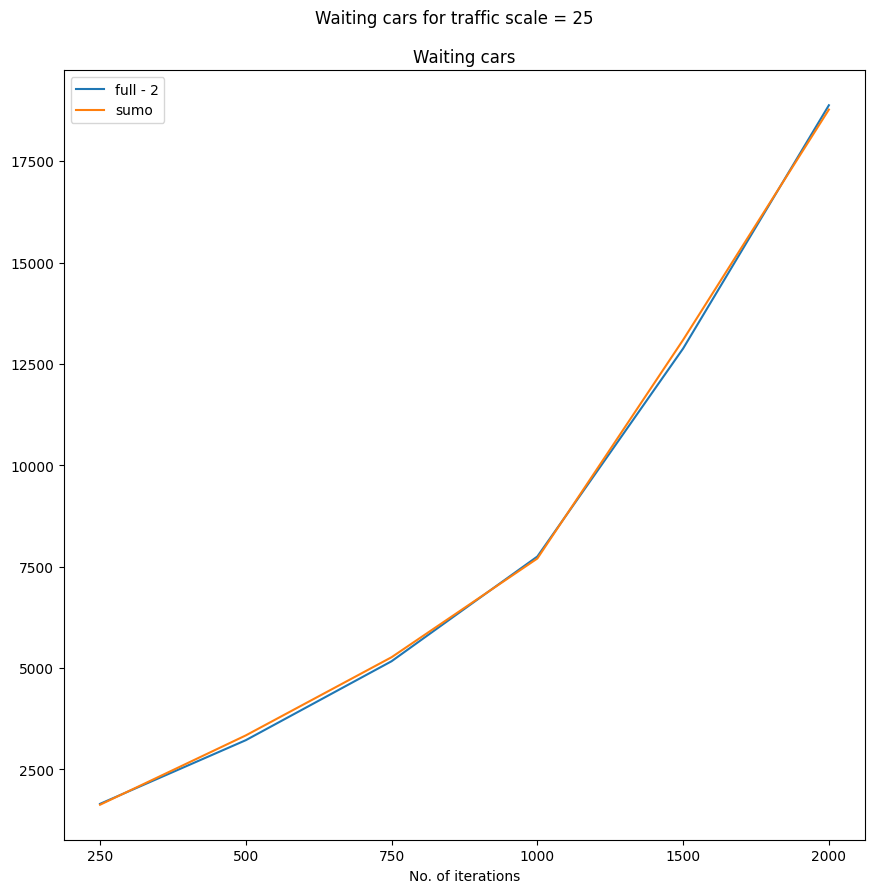

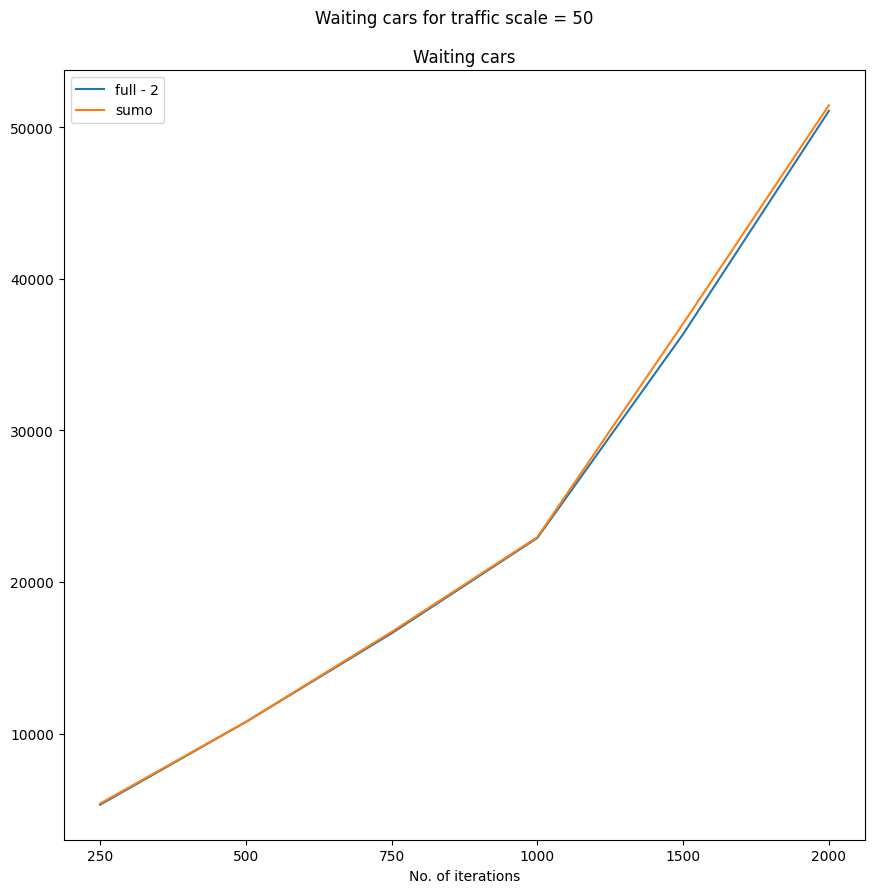

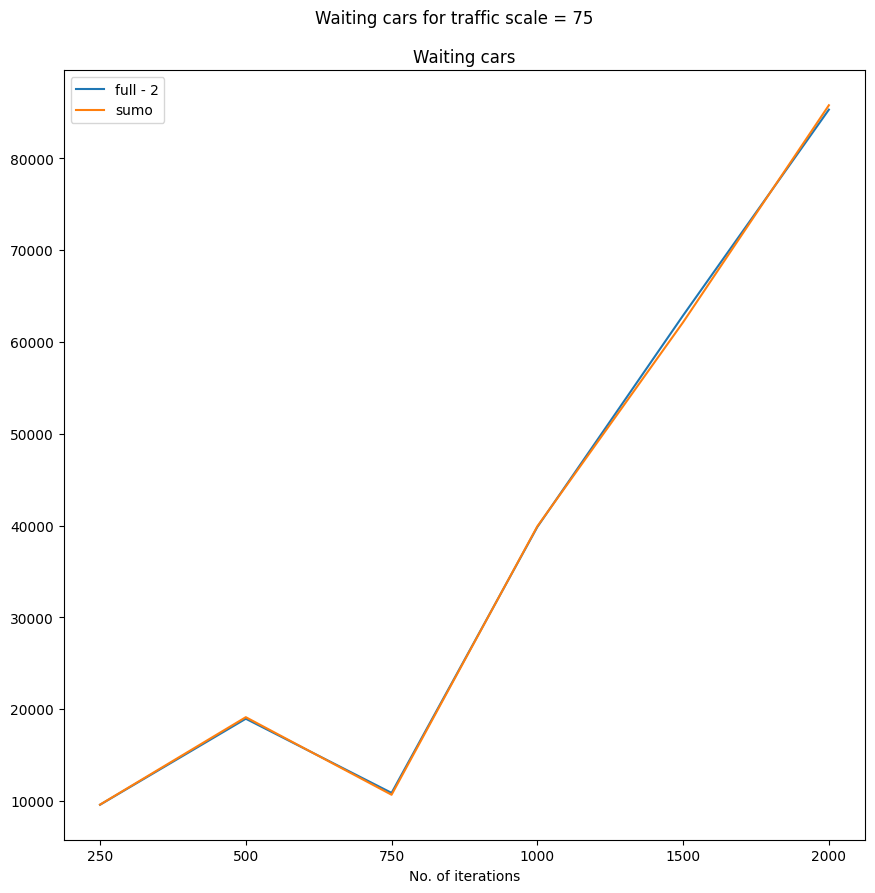

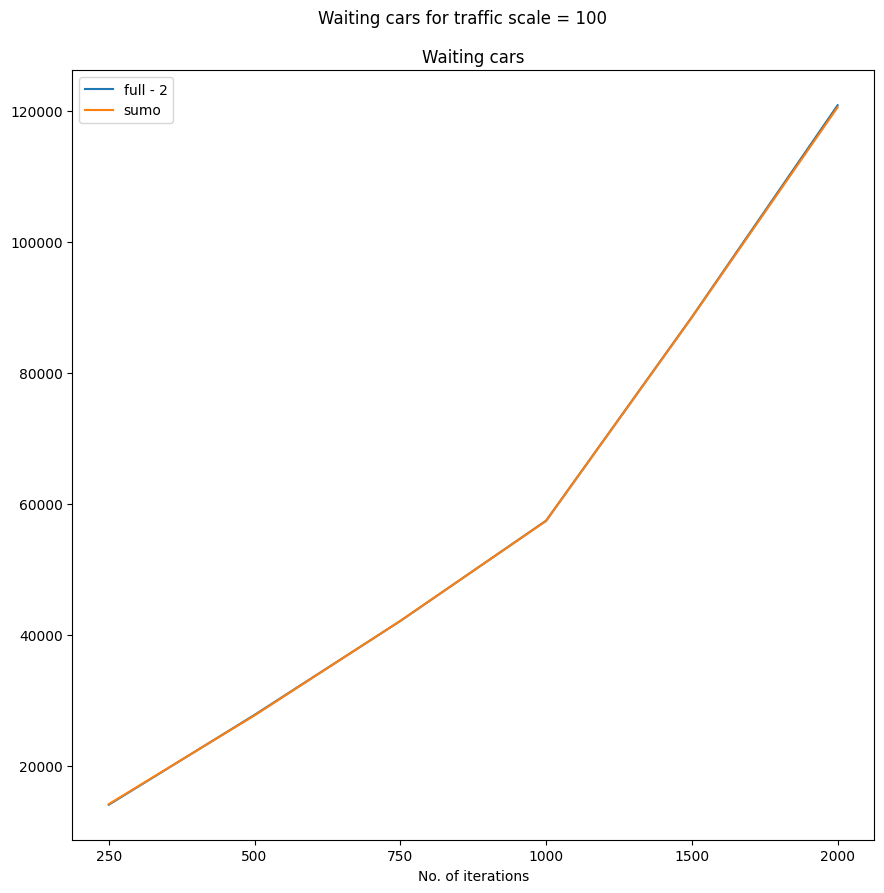

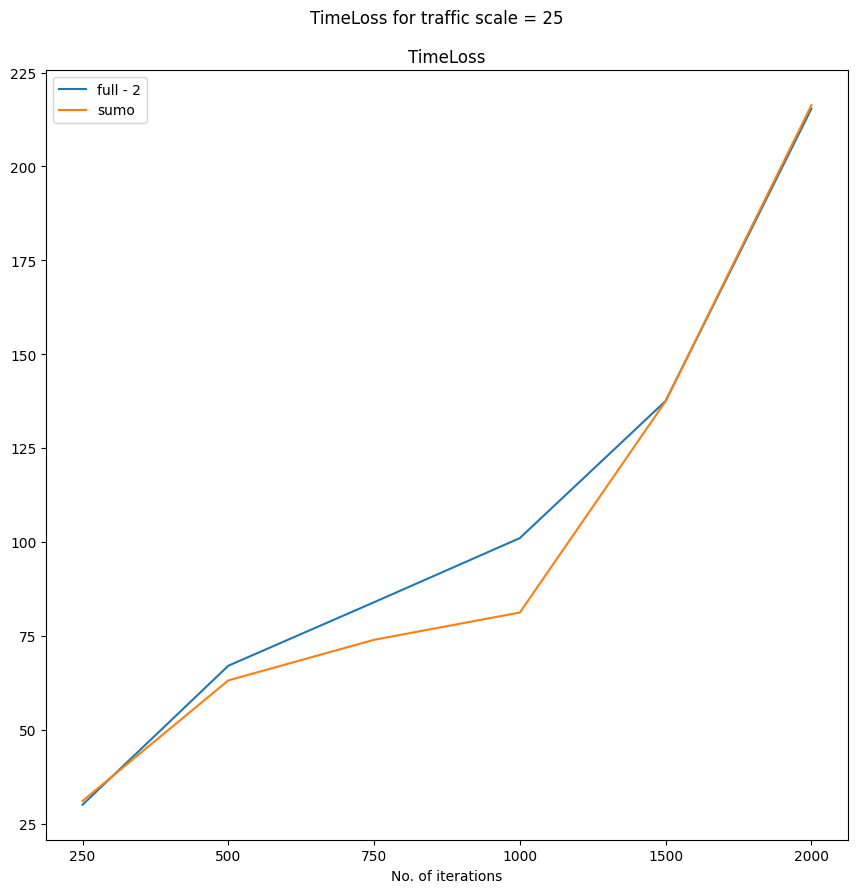

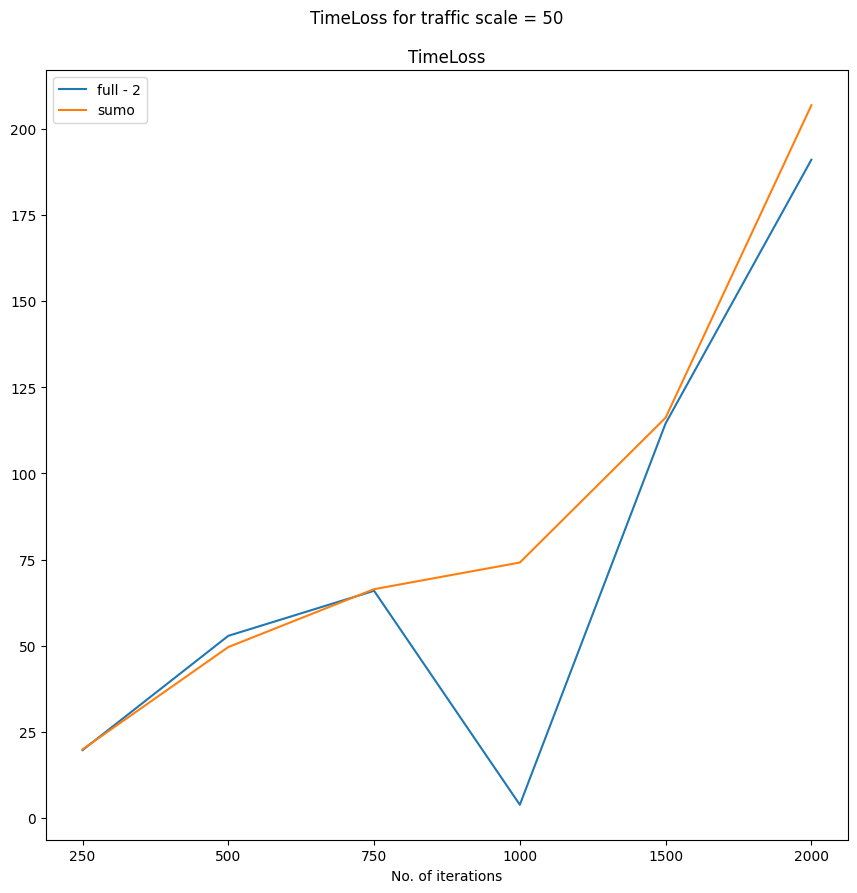

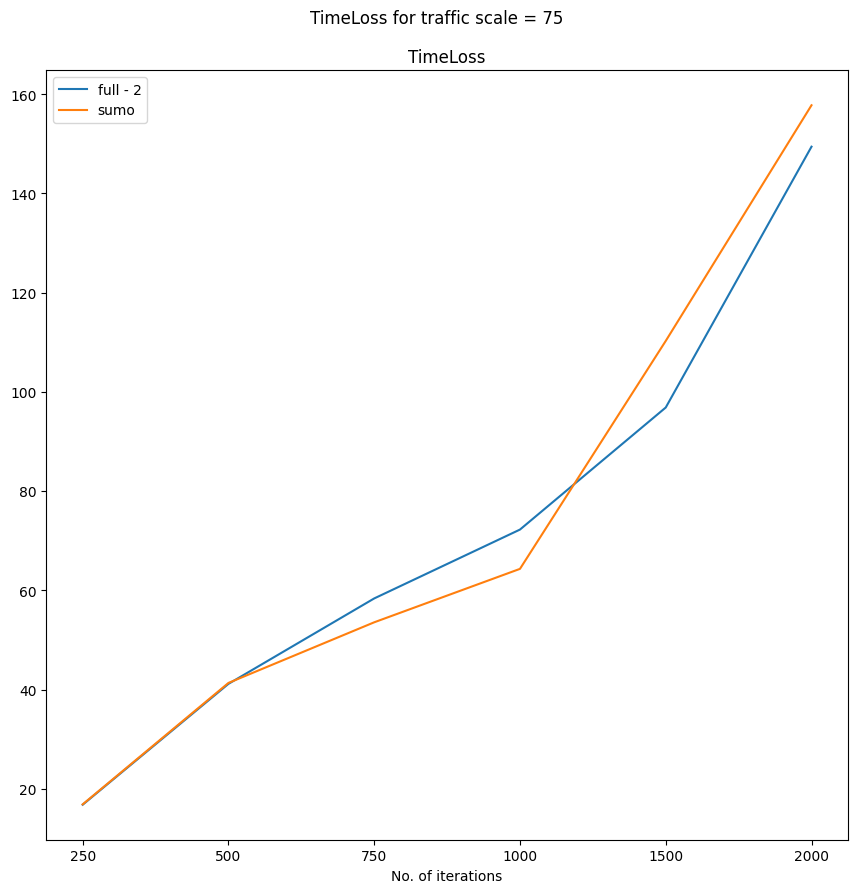

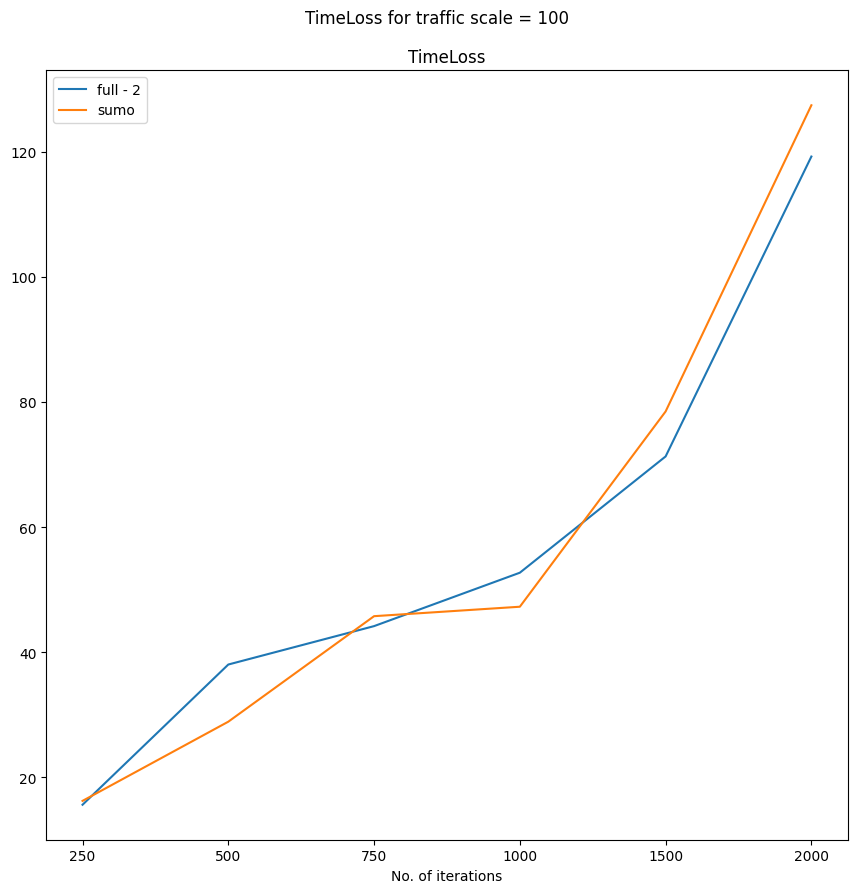

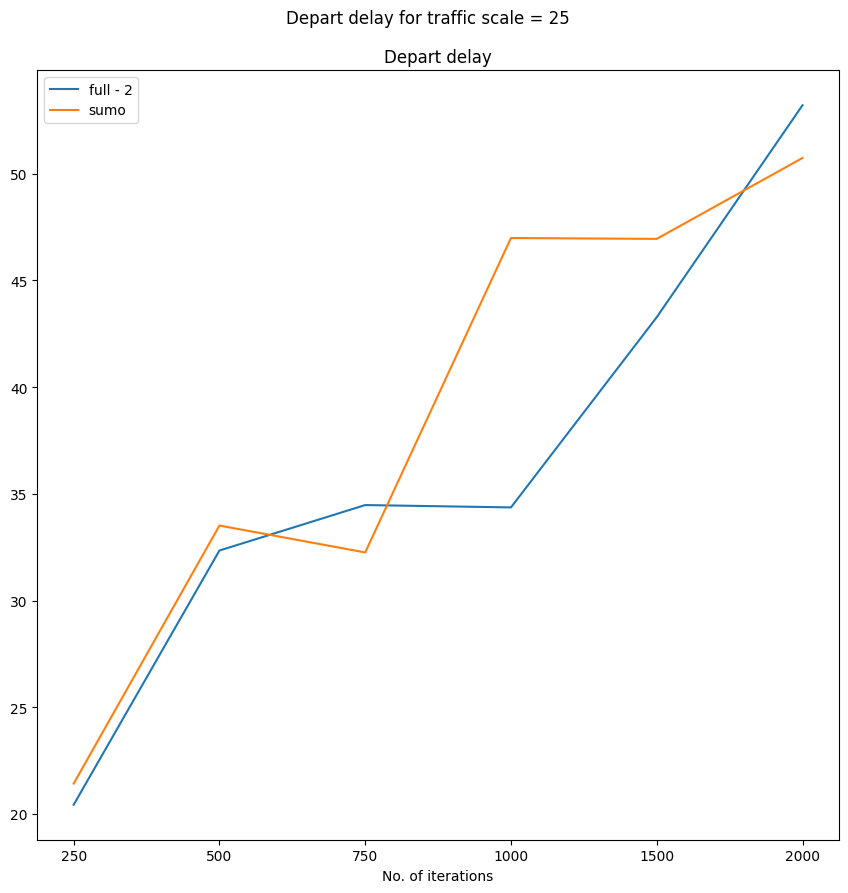

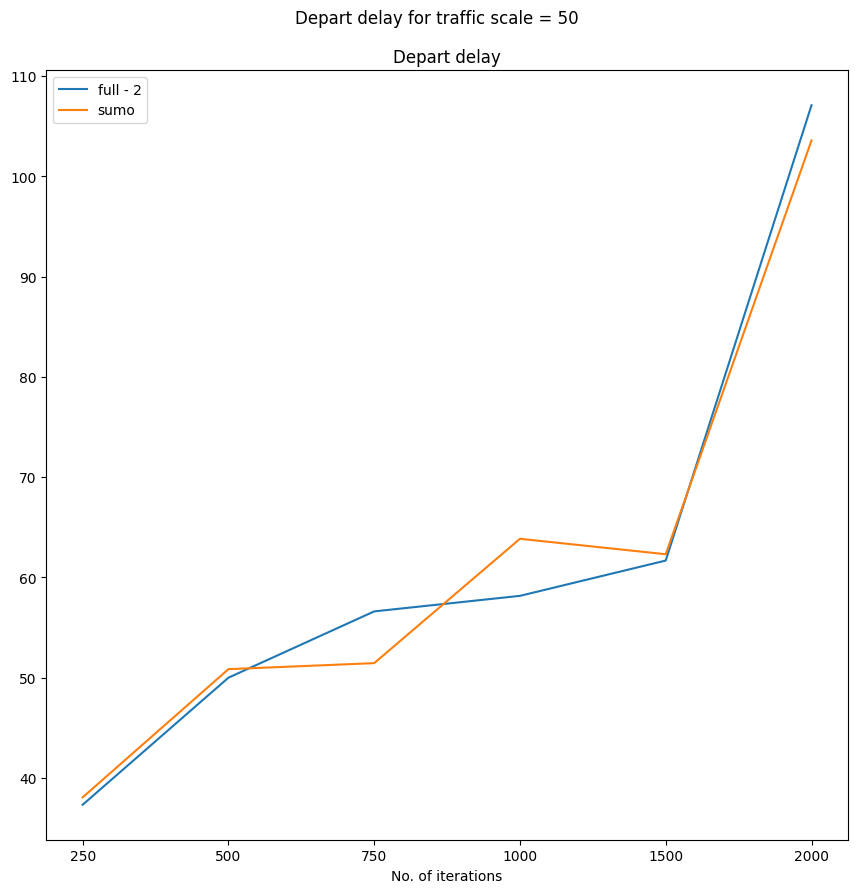

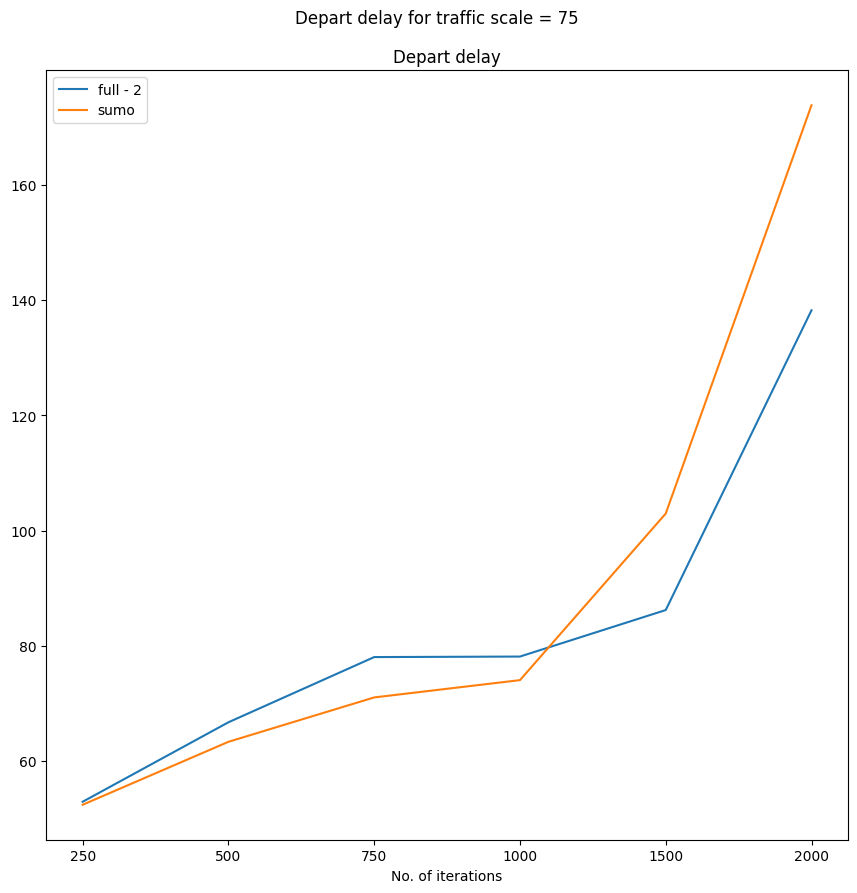

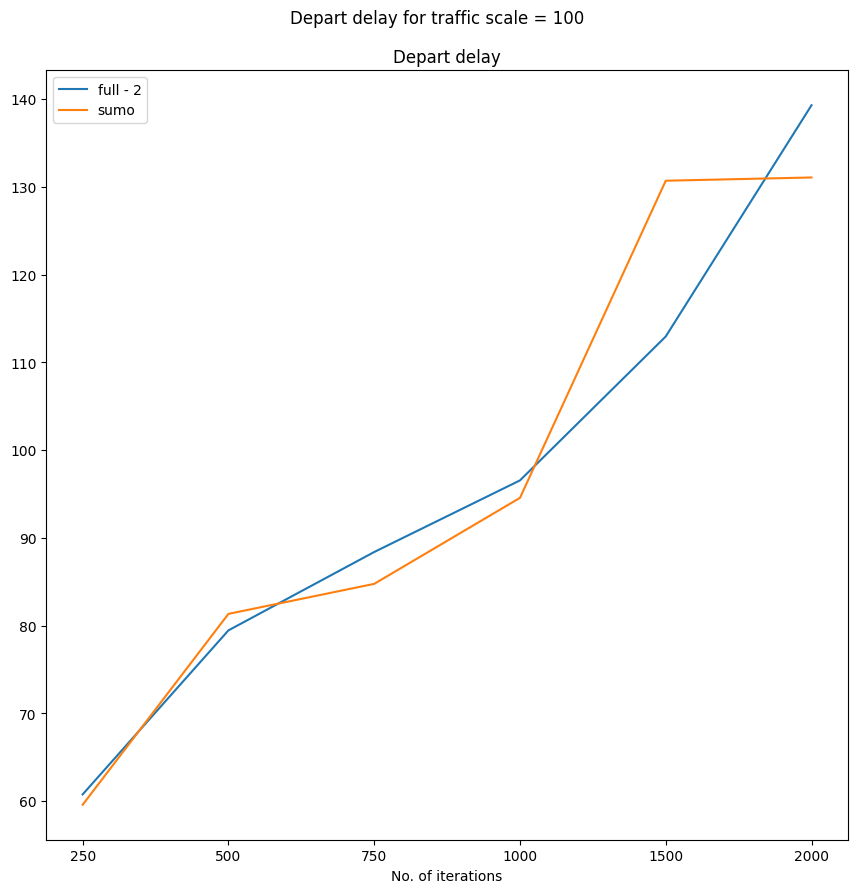

In [ ]:
for x in variables:
  for y in scale:
    visualization_alex(y,x)

In [ ]:
def visualization_average_lust(variable):
 f1, ax1= plt.subplots(figsize=(9,9), nrows=1, ncols=1)
 f1.tight_layout(pad=2)

 f1.suptitle(f"Average {variable} for LuST dataset")
 x = ["simple-1", "simple-2", "full-1", "full-2", "sumo"]
 df_average = df_lust[df_lust['Team member'] == "All"]

 ax1.plot(x, variable, data = df_average)

 plt.show()

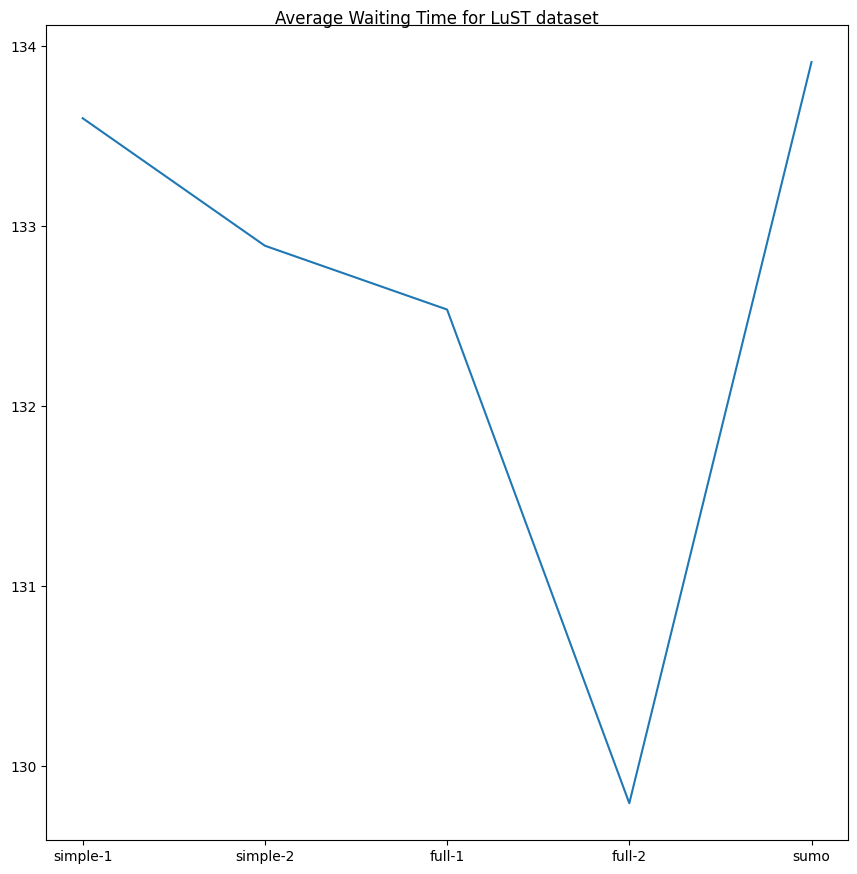

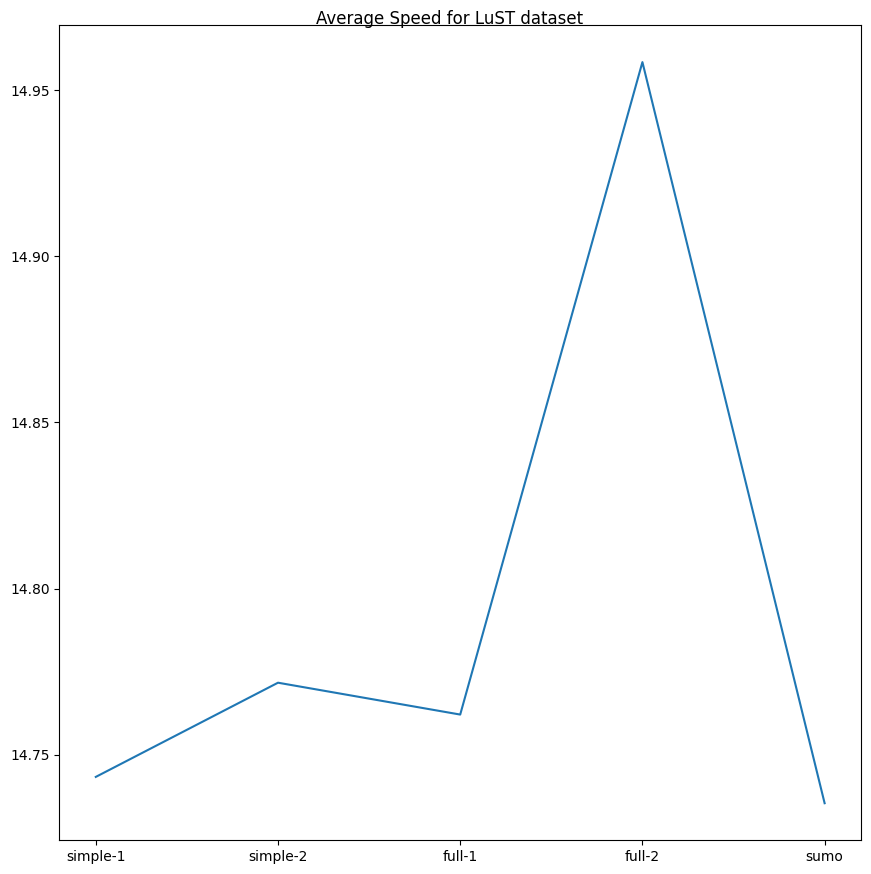

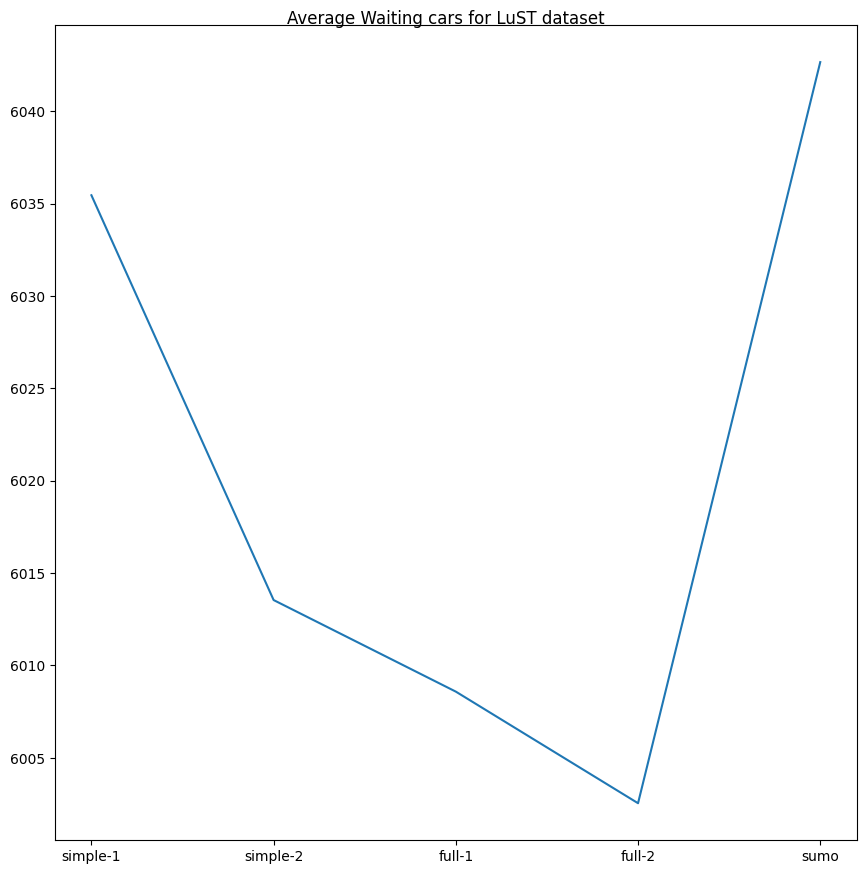

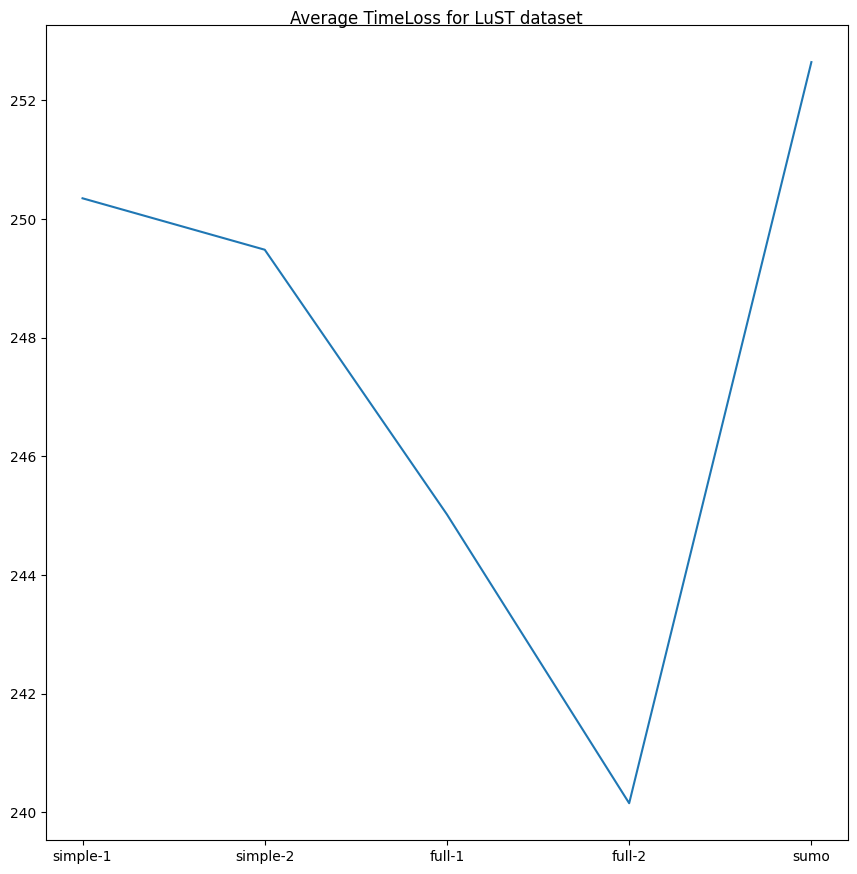

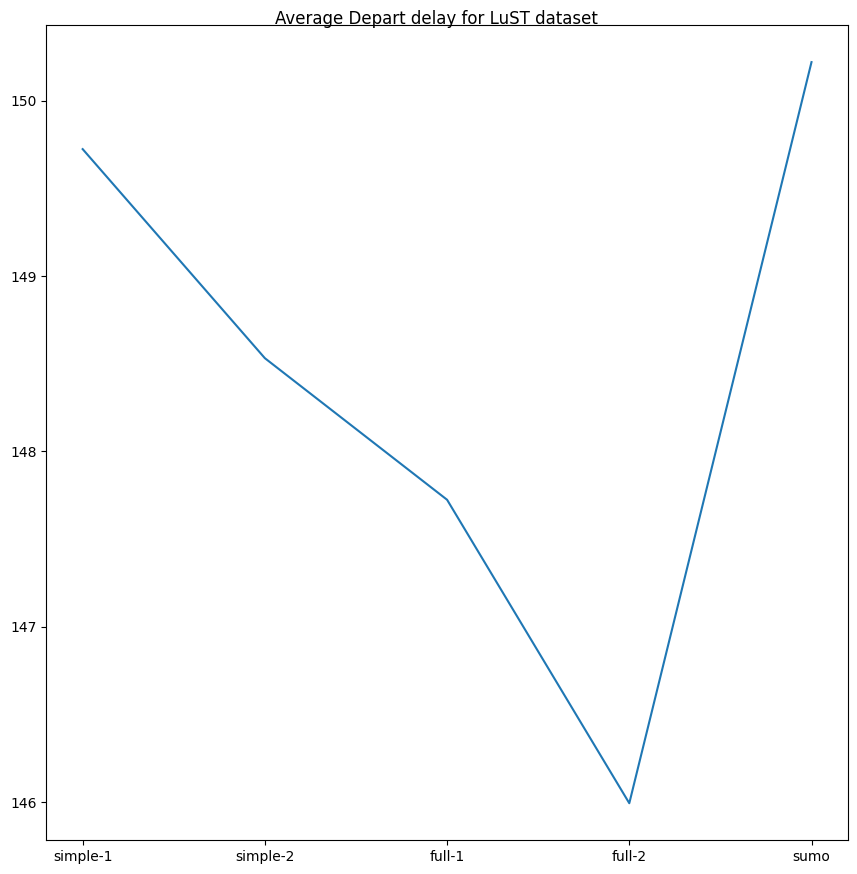

In [ ]:
for x in variables:
  visualization_average_lust(x)

In [ ]:
def visualization_average_alex(variable):
 f1, ax1= plt.subplots(figsize=(9,9), nrows=1, ncols=1)
 f1.tight_layout(pad=2)

 f1.suptitle(f"Average {variable} for AlST dataset")
 x = ["full-2", "sumo"]
 df_average = df_alex[df_alex['Team member'] == "All"]

 ax1.plot(x, variable, data = df_average)

 plt.show()

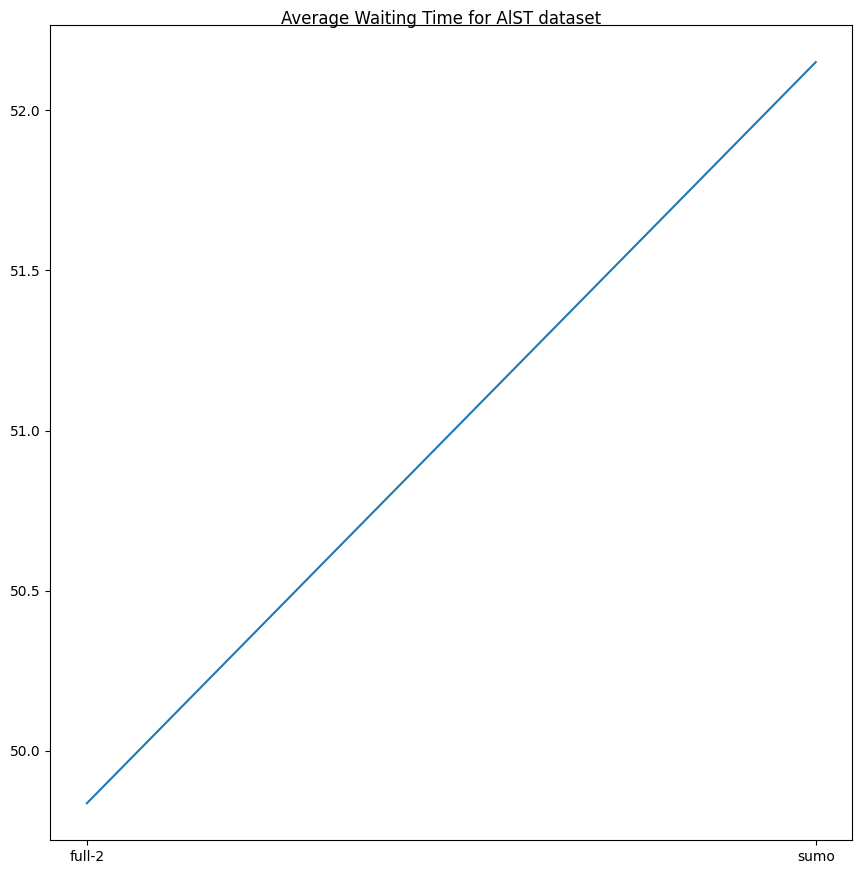

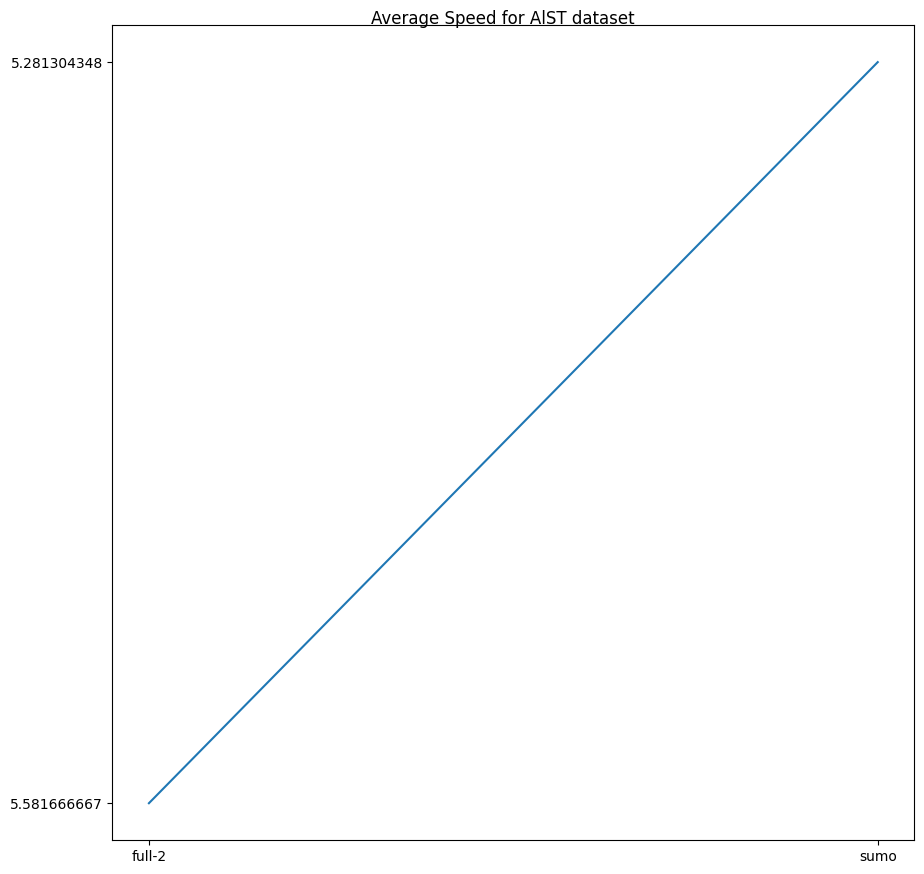

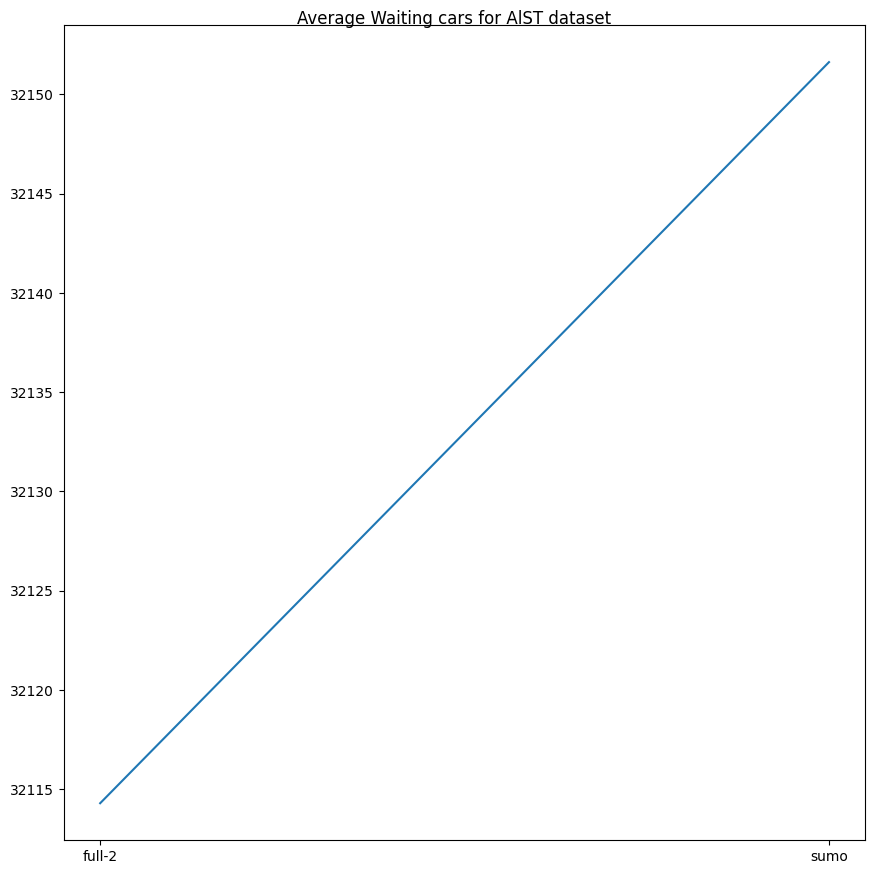

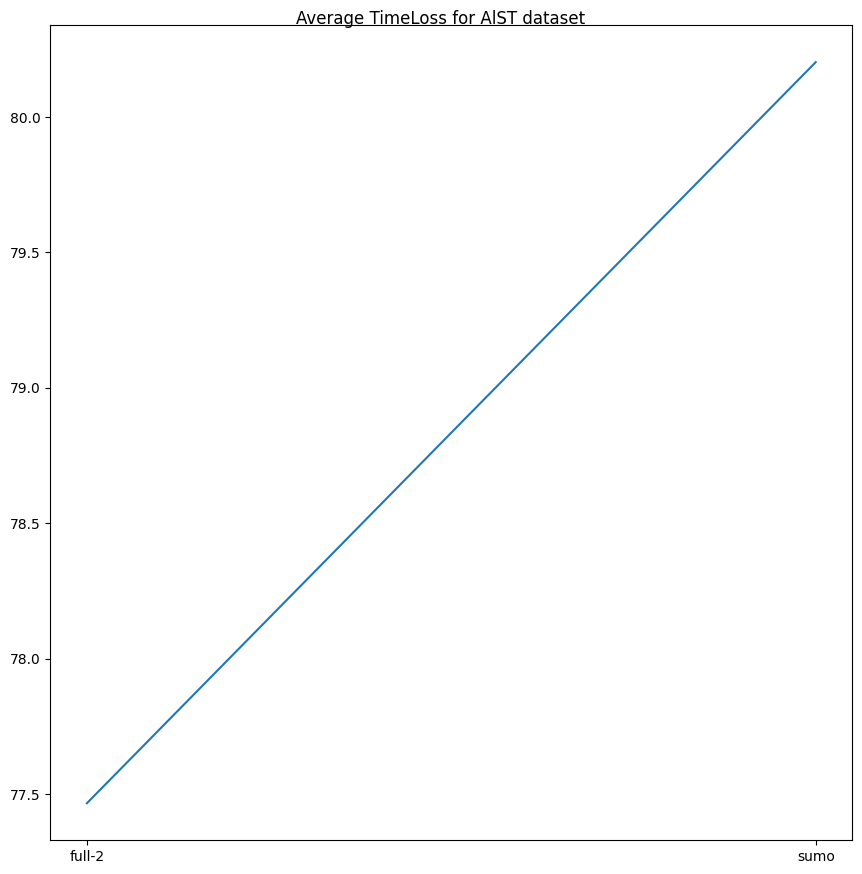

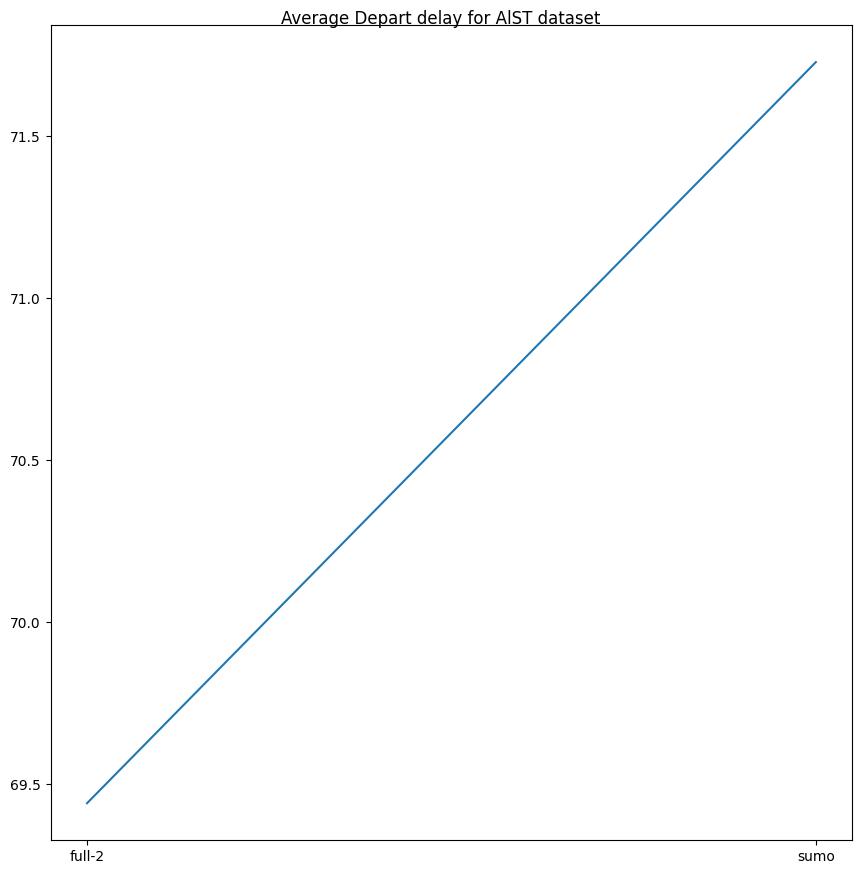

In [ ]:
for x in variables:
  visualization_average_alex(x)